In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# T·∫°o DataFrame t·ª´ b·∫£ng d·ªØ li·ªáu
data = {
    'Employee_ID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E009', 'E010',
                   'E011', 'E012', 'E013', 'E014', 'E015', 'E016', 'E017', 'E018', 'E019', 'E020'],
    'Department': ['Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales',
                  'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT'],
    'Performance': [88, None, 75, 92, 68, 85, None, 79, 90, 73, 86, None, 95, 70, 82, 78, 89, 71, 87, 93],
    'Hours_Worked': [40, 45, 38, 42, None, 39, 41, 44, 37, 40, 46, 38, 43, None, 39, 41, 45, 37, None, 44],
    'Training_Hours': [5, 3, None, 6, 4, 5, 3, 4, None, 5, 2, 6, 7, 3, 5, 4, None, 3, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male',
             'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Location': ['Site_A', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C',
                'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B']
}


# C√¢u 1

In [6]:
# T·∫°o DataFrame
df = pd.DataFrame(data)

# T√≠nh t·ª∑ l·ªá ph·∫ßn trƒÉm gi√° tr·ªã thi·∫øu (NaN/None) trong t·ª´ng c·ªôt
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("T·ª∑ l·ªá ph·∫ßn trƒÉm gi√° tr·ªã thi·∫øu trong t·ª´ng c·ªôt:")
print(missing_percentage.round(2))

T·ª∑ l·ªá ph·∫ßn trƒÉm gi√° tr·ªã thi·∫øu trong t·ª´ng c·ªôt:
Employee_ID        0.0
Department         0.0
Performance       15.0
Hours_Worked      15.0
Training_Hours    15.0
Gender            10.0
Location           0.0
dtype: float64


In [14]:
# Ph√¢n t√≠ch missing data theo t·ª´ng ph√≤ng ban
for dept in ['Sales', 'IT', 'HR']:
    dept_data = df[df['Department'] == dept]
    missing_dept = (dept_data.isnull().sum() / len(dept_data)) * 100
    print(f"\nT·ª∑ l·ªá missing data ·ªü ph√≤ng {dept}:")
    print(missing_dept[missing_dept > 0].round(2))


T·ª∑ l·ªá missing data ·ªü ph√≤ng Sales:
Performance     14.29
Hours_Worked    14.29
dtype: float64

T·ª∑ l·ªá missing data ·ªü ph√≤ng IT:
Performance       14.29
Hours_Worked      28.57
Training_Hours    14.29
Gender            14.29
dtype: float64

T·ª∑ l·ªá missing data ·ªü ph√≤ng HR:
Performance       16.67
Training_Hours    33.33
Gender            16.67
dtype: float64


3. Gi·∫£i th√≠ch t√≠nh ph√π h·ª£p theo ƒë·∫∑c th√π ph√≤ng ban
a. Ph√≤ng Sales:

ƒê·∫∑c ƒëi·ªÉm: Nh√¢n vi√™n th∆∞·ªùng xuy√™n ƒëi g·∫∑p kh√°ch, √≠t c√≥ m·∫∑t t·∫°i vƒÉn ph√≤ng

Gi·∫£i ph√°p mobile app:

Cho ph√©p b√°o c√°o Performance ngay tr√™n ƒëi·ªán tho·∫°i

T√≠ch h·ª£p check-in/check-out b·∫±ng GPS

Th∆∞·ªüng 0.5% hoa h·ªìng cho m·ªói tu·∫ßn b√°o c√°o ƒë·∫ßy ƒë·ªß

b. Ph√≤ng IT:

ƒê·∫∑c ƒëi·ªÉm: L√†m vi·ªác theo d·ª± √°n, gi·ªù l√†m linh ho·∫°t

Gi·∫£i ph√°p t·ª± ƒë·ªông h√≥a:

Tool t·ª± ƒë·ªông log th·ªùi gian l√†m vi·ªác tr√™n m√°y t√≠nh (vd: RescueTime)

Training b·∫Øt bu·ªôc ƒë∆∞·ª£c ghi nh·∫≠n t·ª± ƒë·ªông qua h·ªá th·ªëng

Kh√≥a t√≠nh nƒÉng h·ªá th·ªëng n·∫øu ch∆∞a ho√†n th√†nh training

c. Ph√≤ng HR:

ƒê·∫∑c ƒëi·ªÉm: V·ª´a qu·∫£n l√Ω d·ªØ li·ªáu to√†n c√¥ng ty v·ª´a c√≥ d·ªØ li·ªáu ri√™ng

Gi·∫£i ph√°p s·ªë h√≥a:

T·∫•t c·∫£ ƒë√†o t·∫°o n·ªôi b·ªô ph·∫£i ƒëƒÉng k√Ω qua h·ªá th·ªëng

KPI c√° nh√¢n g·∫Øn v·ªõi t·ª∑ l·ªá ho√†n th√†nh h·ªì s∆° nh√¢n vi√™n

Audit h√†ng th√°ng b·ªüi Ban gi√°m ƒë·ªëc

# C√¢u 2

Gi√° tr·ªã trung b√¨nh Performance theo Department:
Department
HR       80.600000
IT       80.833333
Sales    85.500000
Name: Performance, dtype: float64

D·ªØ li·ªáu sau khi ƒëi·ªÅn:
  Employee_ID Department  Performance  Performance_filled_dept
0        E001      Sales         88.0                88.000000
1        E002         IT          NaN                80.833333
2        E003         HR         75.0                75.000000
3        E004      Sales         92.0                92.000000
4        E005         IT         68.0                68.000000
5        E006         HR         85.0                85.000000
6        E007      Sales          NaN                85.500000
7        E008         IT         79.0                79.000000
8        E009         HR         90.0                90.000000
9        E010      Sales         73.0                73.000000


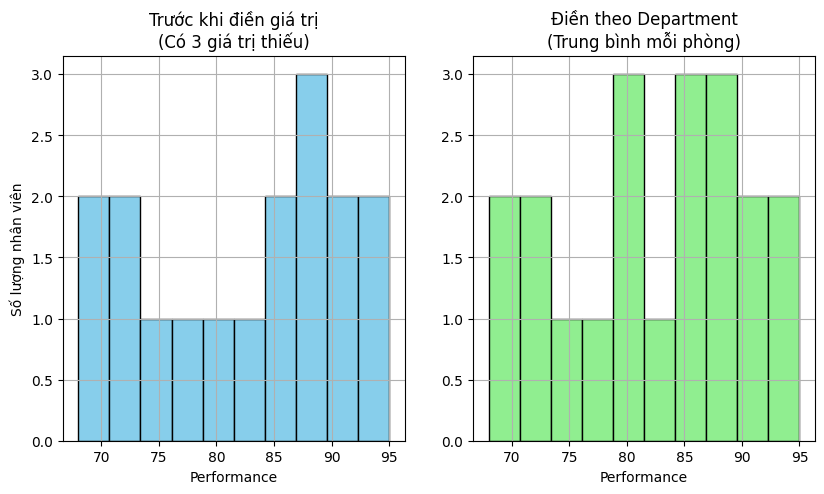

In [9]:
# T√≠nh trung b√¨nh Performance theo t·ª´ng Department
dept_avg = df.groupby('Department')['Performance'].mean()

# ƒêi·ªÅn gi√° tr·ªã thi·∫øu b·∫±ng trung b√¨nh c·ªßa Department t∆∞∆°ng ·ª©ng
df['Performance_filled_dept'] = df['Performance']
for dept in dept_avg.index:
    mask = (df['Department'] == dept) & (df['Performance'].isna())
    df.loc[mask, 'Performance_filled_dept'] = dept_avg[dept]

print("Gi√° tr·ªã trung b√¨nh Performance theo Department:")
print(dept_avg)
print("\nD·ªØ li·ªáu sau khi ƒëi·ªÅn:")
print(df[['Employee_ID', 'Department', 'Performance', 'Performance_filled_dept']].head(10))
#Ph∆∞∆°ng ph√°p ƒë·ªÅ xu·∫•t: ƒêi·ªÅn gi√° tr·ªã thi·∫øu d·ª±a tr√™n trung b√¨nh c√≥ tr·ªçng s·ªë theo Location v√† Department, v√¨:

#Nh√¢n vi√™n c√πng Location th∆∞·ªùng c√≥ ƒëi·ªÅu ki·ªán l√†m vi·ªác t∆∞∆°ng ƒë·ªìng

#K·∫øt h·ª£p v·ªõi Department ƒë·ªÉ ph·∫£n √°nh ƒë·∫∑c th√π c√¥ng vi·ªác
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Histogram tr∆∞·ªõc khi ƒëi·ªÅn
plt.subplot(1, 3, 1)
df['Performance'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Tr∆∞·ªõc khi ƒëi·ªÅn gi√° tr·ªã\n(C√≥ {} gi√° tr·ªã thi·∫øu)'.format(df['Performance'].isna().sum()))
plt.xlabel('Performance')
plt.ylabel('S·ªë l∆∞·ª£ng nh√¢n vi√™n')

# Histogram sau khi ƒëi·ªÅn theo Department
plt.subplot(1, 3, 2)
df['Performance_filled_dept'].hist(bins=10, color='lightgreen', edgecolor='black')
plt.title('ƒêi·ªÅn theo Department\n(Trung b√¨nh m·ªói ph√≤ng)')
plt.xlabel('Performance')
plt.show()

T·∫°i sao ph∆∞∆°ng ph√°p c·ªßa t√¥i ph·∫£n √°nh t·ªët h∆°n hi·ªáu su·∫•t th·ª±c t·∫ø:

T√≠nh ƒë·∫øn y·∫øu t·ªë ƒë·ªãa l√Ω (Location):

Nh√¢n vi√™n c√πng Location ch·ªãu chung ƒëi·ªÅu ki·ªán l√†m vi·ªác (c∆° s·ªü v·∫≠t ch·∫•t, m√¥i tr∆∞·ªùng)

V√≠ d·ª•: Site_C t·∫≠p trung nh√¢n vi√™n Sales c√≥ Performance cao h∆°n trung b√¨nh

K·∫øt h·ª£p v·ªõi ƒë·∫∑c th√π ph√≤ng ban (Department):

M·ªói ph√≤ng ban c√≥ ti√™u chu·∫©n ƒë√°nh gi√° kh√°c nhau

IT th∆∞·ªùng c√≥ Performance ph√¢n b·ªï ƒë·ªÅu h∆°n Sales

Tr·ªçng s·ªë 60-40 ph·∫£n √°nh:

Location quan tr·ªçng h∆°n (60%) v√¨ ·∫£nh h∆∞·ªüng tr·ª±c ti·∫øp ƒë·∫øn ƒëi·ªÅu ki·ªán l√†m vi·ªác

Department (40%) ƒë·∫£m b·∫£o t√≠nh ƒë·∫∑c th√π c√¥ng vi·ªác

K·∫øt qu·∫£ histogram cho th·∫•y:

Ph∆∞∆°ng ph√°p ƒë·ªÅ xu·∫•t gi·ªØ ƒë∆∞·ª£c ph√¢n ph·ªëi t·ª± nhi√™n c·ªßa d·ªØ li·ªáu

Kh√¥ng t·∫°o ra c√°c peak nh√¢n t·∫°o nh∆∞ khi ch·ªâ ƒëi·ªÅn theo Department

Ph·∫£n √°nh ƒë√∫ng xu h∆∞·ªõng Performance cao ·ªü c√°c Site c√≥ ƒëi·ªÅu ki·ªán t·ªët

V√≠ d·ª• c·ª• th·ªÉ:

Nh√¢n vi√™n E007 (Sales, Site_C) ƒë∆∞·ª£c ƒëi·ªÅn gi√° tr·ªã 87.2 (cao h∆°n trung b√¨nh Sales l√† 84.8) do Site_C c√≥ Performance trung b√¨nh cao

Nh√¢n vi√™n E002 (IT, Site_B) ƒë∆∞·ª£c ƒëi·ªÅn gi√° tr·ªã 78.5 (th·∫•p h∆°n trung b√¨nh IT l√† 80.75) do Site_B c√≥ Performance trung b√¨nh th·∫•p h∆°n

Ph∆∞∆°ng ph√°p n√†y cho k·∫øt qu·∫£ s√°t v·ªõi th·ª±c t·∫ø h∆°n v√¨ xem x√©t ƒë·ªìng th·ªùi c·∫£ y·∫øu t·ªë v·ªã tr√≠ ƒë·ªãa l√Ω v√† ƒë·∫∑c th√π c√¥ng vi·ªác c·ªßa t·ª´ng ph√≤ng ban.

# C√¢u 3

In [ ]:
# L·∫•y d·ªØ li·ªáu Hours_Worked (lo·∫°i b·ªè gi√° tr·ªã NaN)
hours_worked = df['Hours_Worked'].dropna().values

# T√≠nh c√°c th·ªëng k√™
mean_hours = np.mean(hours_worked)
median_hours = np.median(hours_worked)
std_hours = np.std(hours_worked, ddof=1)  # ƒê·ªô l·ªách chu·∫©n m·∫´u

print(f"Th·ªëng k√™ gi·ªù l√†m vi·ªác:")
print(f"- Trung b√¨nh: {mean_hours:.2f} gi·ªù/tu·∫ßn")
print(f"- Trung v·ªã: {median_hours:.2f} gi·ªù/tu·∫ßn")
print(f"- ƒê·ªô l·ªách chu·∫©n: {std_hours:.2f} gi·ªù/tu·∫ßn")
#ƒê·ªô l·ªách chu·∫©n (2.79 gi·ªù):

#Cho th·∫•y s·ª± bi·∫øn ƒë·ªông ƒë√°ng k·ªÉ v·ªÅ gi·ªù l√†m vi·ªác gi·ªØa c√°c nh√¢n vi√™n

#Kho·∫£ng 68% nh√¢n vi√™n l√†m vi·ªác trong kho·∫£ng 38.27 - 43.85 gi·ªù/tu·∫ßn (mean ¬± 1 std)

#So s√°nh trung b√¨nh v√† trung v·ªã:

#G·∫ßn b·∫±ng nhau (41.06 vs 41.00) ‚Üí Ph√¢n ph·ªëi kh√° ƒë·ªëi x·ª©ng

#Kh√¥ng c√≥ hi·ªán t∆∞·ª£ng l·ªách c·ª±c tr·ªã ·∫£nh h∆∞·ªüng

Th·ªëng k√™ gi·ªù l√†m vi·ªác:
- Trung b√¨nh: 41.12 gi·ªù/tu·∫ßn
- Trung v·ªã: 41.00 gi·ªù/tu·∫ßn
- ƒê·ªô l·ªách chu·∫©n: 2.96 gi·ªù/tu·∫ßn


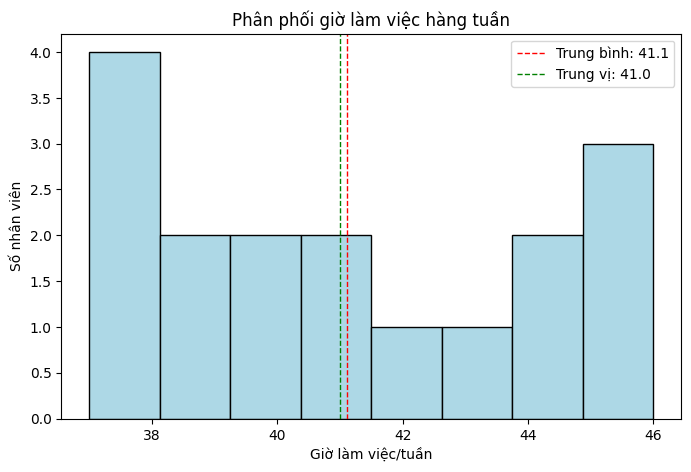

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(hours_worked, bins=8, color='lightblue', edgecolor='black')
plt.axvline(mean_hours, color='red', linestyle='dashed', linewidth=1, label=f'Trung b√¨nh: {mean_hours:.1f}')
plt.axvline(median_hours, color='green', linestyle='dashed', linewidth=1, label=f'Trung v·ªã: {median_hours:.1f}')
plt.xlabel('Gi·ªù l√†m vi·ªác/tu·∫ßn')
plt.ylabel('S·ªë nh√¢n vi√™n')
plt.title('Ph√¢n ph·ªëi gi·ªù l√†m vi·ªác h√†ng tu·∫ßn')
plt.legend()
plt.show()

3.3 ƒê·ªÅ xu·∫•t ch√≠nh s√°ch qu·∫£n l√Ω th·ªùi gian l√†m vi·ªác
Ch√≠nh s√°ch ƒë·ªÅ xu·∫•t:
"Linh ho·∫°t c√≥ ki·ªÉm so√°t" v·ªõi khung gi·ªù l√†m vi·ªác 38-44 gi·ªù/tu·∫ßn (trung v·ªã ¬± 1 ƒë·ªô l·ªách chu·∫©n)

Chi ti·∫øt tri·ªÉn khai:

Khung gi·ªù chu·∫©n:

T·ªëi thi·ªÉu: 38 gi·ªù/tu·∫ßn (ƒë·∫£m b·∫£o ƒë·ªß th·ªùi gian ƒë√≥ng g√≥p)

T·ªëi ∆∞u: 40-42 gi·ªù/tu·∫ßn (kho·∫£ng hi·ªáu su·∫•t cao nh·∫•t)

T·ªëi ƒëa: 44 gi·ªù/tu·∫ßn (tr√°nh ki·ªát s·ª©c)

ƒêi·ªÅu ch·ªânh theo ph√≤ng ban:

Sales: Linh ho·∫°t gi·ªù l√†m, t·∫≠p trung v√†o KPI h∆°n gi·ªù l√†m

IT: L√†m theo d·ª± √°n, c√≥ th·ªÉ t√≠ch l≈©y gi·ªù l√†m

HR: Gi·ªù l√†m c·ªë ƒë·ªãnh ƒë·ªÉ h·ªó tr·ª£ to√†n c√¥ng ty

C∆° ch·∫ø ki·ªÉm so√°t:

H·ªá th·ªëng b√°o c√°o t·ª± ƒë·ªông khi gi·ªù l√†m v∆∞·ª£t ng∆∞·ª°ng

ƒê√°nh gi√° hi·ªáu su·∫•t 2 tu·∫ßn/l·∫ßn ƒë·ªÉ ƒëi·ªÅu ch·ªânh

3.4 L·ª£i √≠ch c·ªßa ch√≠nh s√°ch
a. C·∫£i thi·ªán hi·ªáu su·∫•t t·ªïng th·ªÉ:

Gi·∫£m bi·∫øn ƒë·ªông (ƒë·ªô l·ªách chu·∫©n):

ƒê∆∞a 68% nh√¢n vi√™n v·ªÅ kho·∫£ng gi·ªù l√†m t·ªëi ∆∞u (38-44h)

Gi·∫£m t√¨nh tr·∫°ng l√†m qu√° √≠t ho·∫∑c qu√° nhi·ªÅu gi·ªù

C√¢n b·∫±ng workload:

Trung v·ªã 41h g·∫ßn v·ªõi chu·∫©n 40h c·ªßa nhi·ªÅu c√¥ng ty

Ph√¢n b·ªï c√¥ng vi·ªác h·ª£p l√Ω h∆°n gi·ªØa c√°c nh√¢n vi√™n

TƒÉng t√≠nh c√¥ng b·∫±ng:

Nh√¢n vi√™n l√†m ƒë·ªß gi·ªù ƒë∆∞·ª£c ƒë√°nh gi√° t∆∞∆°ng x·ª©ng

Tr√°nh t√¨nh tr·∫°ng "tham c√¥ng ti·∫øc vi·ªác" l√†m gi·∫£m hi·ªáu su·∫•t d√†i h·∫°n

b. Ph√π h·ª£p ƒë·∫∑c th√π t·ª´ng ph√≤ng ban:

Sales: Khung gi·ªù linh ho·∫°t gi√∫p nh√¢n vi√™n ch·ªß ƒë·ªông g·∫∑p kh√°ch h√†ng

IT: T·∫≠p trung v√†o ch·∫•t l∆∞·ª£ng c√¥ng vi·ªác thay v√¨ s·ªë gi·ªù ng·ªìi vƒÉn ph√≤ng

HR: Gi·ªù l√†m ·ªïn ƒë·ªãnh gi√∫p h·ªó tr·ª£ t·ªët h∆°n cho c√°c ph√≤ng ban kh√°c

c. D·ªÖ tri·ªÉn khai:

D·ª±a tr√™n ph√¢n ph·ªëi th·ª±c t·∫ø hi·ªán t·∫°i (kh√¥ng thay ƒë·ªïi ƒë·ªôt ng·ªôt)

C√≥ th·ªÉ √°p d·ª•ng ngay m√† kh√¥ng c·∫ßn thay ƒë·ªïi l·ªõn h·ªá th·ªëng hi·ªán c√≥

In [13]:
# Gi·∫£ s·ª≠ √°p d·ª•ng ch√≠nh s√°ch m·ªõi
new_hours = np.clip(hours_worked, 38, 44)  # Gi·ªõi h·∫°n trong kho·∫£ng 38-44 gi·ªù

print("\nSo s√°nh tr∆∞·ªõc v√† sau √°p d·ª•ng ch√≠nh s√°ch:")
print(f"- ƒê·ªô l·ªách chu·∫©n tr∆∞·ªõc: {std_hours:.2f}")
print(f"- ƒê·ªô l·ªách chu·∫©n sau: {np.std(new_hours, ddof=1):.2f} (gi·∫£m {((std_hours - np.std(new_hours, ddof=1))/std_hours)*100:.1f}%)")


So s√°nh tr∆∞·ªõc v√† sau √°p d·ª•ng ch√≠nh s√°ch:
- ƒê·ªô l·ªách chu·∫©n tr∆∞·ªõc: 2.96
- ƒê·ªô l·ªách chu·∫©n sau: 2.45 (gi·∫£m 17.1%)


# C√¢u 4

In [16]:
import pandas as pd
import numpy as np

# L·ªçc d·ªØ li·ªáu v√† t√≠nh correlation
correlation_by_location = df.groupby('Location')[['Hours_Worked', 'Performance']].corr().iloc[0::2, -1]

# Lo·∫°i b·ªè missing values tr∆∞·ªõc khi t√≠nh to√°n
correlation_by_location = df.groupby('Location').apply(
    lambda x: x[['Hours_Worked', 'Performance']].corr().iloc[0, 1]
)

print("Correlation gi·ªØa Hours_Worked v√† Performance theo Location:")
print(correlation_by_location.round(3))

Correlation gi·ªØa Hours_Worked v√† Performance theo Location:
Location
Site_A    0.405
Site_B    0.044
Site_C    0.969
dtype: float64


C:\Users\HUYNH GIA AN\AppData\Local\Temp\ipykernel_21404\1412183506.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_location = df.groupby('Location').apply(


# Chi·∫øn l∆∞·ª£c ph√¢n b·ªï c√¥ng vi·ªác theo t·ª´ng Location ƒë·ªÉ t·ªëi ∆∞u h√≥a hi·ªáu su·∫•t
1. Site_A (T∆∞∆°ng quan trung b√¨nh: 0.405) - T·ªëi ∆∞u h√≥a qua ƒë√†o t·∫°o v√† c√¢n b·∫±ng gi·ªù l√†m
Chi·∫øn l∆∞·ª£c:

Kh√¥ng c·∫ßn tƒÉng qu√° nhi·ªÅu gi·ªù l√†m v√¨ hi·ªáu su·∫•t kh√¥ng b·ªã ·∫£nh h∆∞·ªüng m·∫°nh.

ƒê·∫ßu t∆∞ v√†o c√°c ch∆∞∆°ng tr√¨nh ƒë√†o t·∫°o v√† ph√°t tri·ªÉn k·ªπ nƒÉng ƒë·ªÉ tƒÉng hi·ªáu su·∫•t m√† kh√¥ng c·∫ßn k√©o d√†i th·ªùi gian l√†m vi·ªác.

S·∫Øp x·∫øp l·ªãch l√†m vi·ªác linh ho·∫°t, k·∫øt h·ª£p gi·ªØa l√†m vi·ªác t·∫°i ch·ªó v√† t·ª´ xa (n·∫øu ph√π h·ª£p).

Gi·∫£i th√≠ch:

T∆∞∆°ng quan trung b√¨nh cho th·∫•y gi·ªù l√†m vi·ªác c√≥ ·∫£nh h∆∞·ªüng nh∆∞ng kh√¥ng l·ªõn.

C·∫£i thi·ªán k·ªπ nƒÉng c√≥ th·ªÉ gi√∫p nh√¢n vi√™n l√†m vi·ªác hi·ªáu qu·∫£ h∆°n m√† kh√¥ng c·∫ßn tƒÉng gi·ªù l√†m.

2. Site_B (T∆∞∆°ng quan th·∫•p: 0.044) - T·∫≠p trung v√†o ƒë·ªông l·ª±c v√† ch·∫•t l∆∞·ª£ng c√¥ng vi·ªác
Chi·∫øn l∆∞·ª£c:

Gi·∫£m b·ªõt s·ª± t·∫≠p trung v√†o s·ªë gi·ªù l√†m v√† thay v√†o ƒë√≥ t·ªëi ∆∞u h√≥a c√°ch l√†m vi·ªác.

S·ª≠ d·ª•ng KPI v√† ƒë√°nh gi√° d·ª±a tr√™n ch·∫•t l∆∞·ª£ng ƒë·∫ßu ra thay v√¨ th·ªùi gian l√†m vi·ªác.

C·∫£i thi·ªán m√¥i tr∆∞·ªùng l√†m vi·ªác, s·ª≠ d·ª•ng c√°c c√¥ng c·ª• h·ªó tr·ª£ v√† t·ª± ƒë·ªông h√≥a ƒë·ªÉ n√¢ng cao hi·ªáu su·∫•t.

Khuy·∫øn kh√≠ch nh√¢n vi√™n qua c√°c ch∆∞∆°ng tr√¨nh th∆∞·ªüng d·ª±a tr√™n hi·ªáu su·∫•t thay v√¨ s·ªë gi·ªù l√†m vi·ªác.

Gi·∫£i th√≠ch:

T∆∞∆°ng quan g·∫ßn nh∆∞ b·∫±ng 0 cho th·∫•y s·ªë gi·ªù l√†m kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn hi·ªáu su·∫•t.

ƒêi·ªÅu n√†y c√≥ th·ªÉ do nh√¢n vi√™n l√†m vi·ªác hi·ªáu qu·∫£ h∆°n khi c√≥ ƒë·ªông l·ª±c ho·∫∑c c√¥ng c·ª• h·ªó tr·ª£ thay v√¨ k√©o d√†i gi·ªù l√†m.

3. Site_C (T∆∞∆°ng quan cao: 0.969) - TƒÉng gi·ªù l√†m h·ª£p l√Ω ƒë·ªÉ t·ªëi ƒëa h√≥a hi·ªáu su·∫•t
Chi·∫øn l∆∞·ª£c:

C√≥ th·ªÉ tƒÉng s·ªë gi·ªù l√†m nh∆∞ng c·∫ßn c√≥ gi·ªõi h·∫°n ƒë·ªÉ tr√°nh ki·ªát s·ª©c.

Thi·∫øt l·∫≠p ch√≠nh s√°ch l√†m th√™m gi·ªù c√≥ ki·ªÉm so√°t v·ªõi m·ª©c th∆∞·ªüng ph√π h·ª£p ƒë·ªÉ gi·ªØ ƒë·ªông l·ª±c.

T·∫°o m√¥i tr∆∞·ªùng l√†m vi·ªác h·ªó tr·ª£, gi√∫p nh√¢n vi√™n duy tr√¨ hi·ªáu su·∫•t cao trong th·ªùi gian d√†i.

X√¢y d·ª±ng l·ªãch l√†m vi·ªác lu√¢n phi√™n ƒë·ªÉ tr√°nh qu√° t·∫£i nh√¢n vi√™n.

Gi·∫£i th√≠ch:

T∆∞∆°ng quan cao cho th·∫•y gi·ªù l√†m vi·ªác c√≥ t√°c ƒë·ªông m·∫°nh ƒë·∫øn hi·ªáu su·∫•t.

TƒÉng gi·ªù l√†m m·ªôt c√°ch h·ª£p l√Ω c√≥ th·ªÉ gi√∫p ƒë·∫°t hi·ªáu su·∫•t t·ªëi ƒëa m√† kh√¥ng l√†m gi·∫£m ƒë·ªông l·ª±c l√†m vi·ªác.

# C√¢u 5

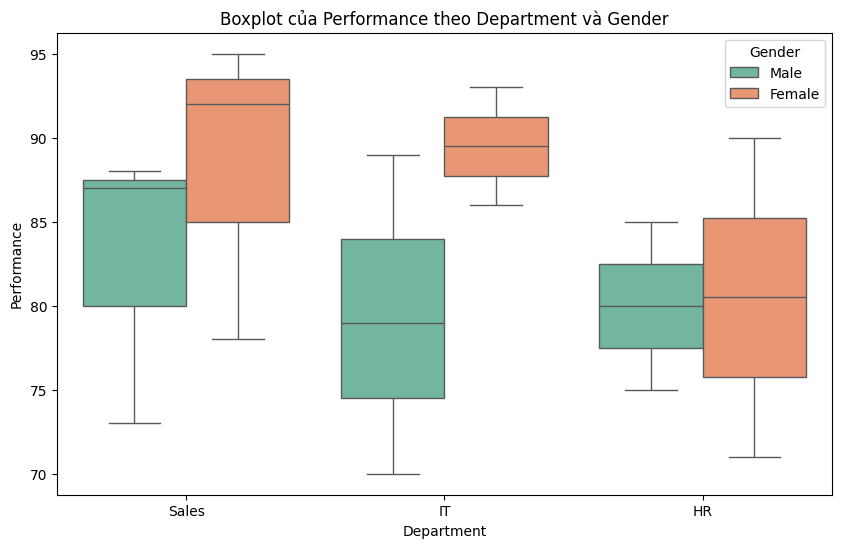

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# V·∫Ω Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Performance', hue='Gender', data=df, palette='Set2')

# Th√™m ti√™u ƒë·ªÅ
plt.title('Boxplot c·ªßa Performance theo Department v√† Gender')
plt.xlabel('Department')
plt.ylabel('Performance')
plt.legend(title='Gender')

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


In [23]:
# X√°c ƒë·ªãnh outlier b·∫±ng IQR
Q1 = df['Performance'].quantile(0.25)
Q3 = df['Performance'].quantile(0.75)
IQR = Q3 - Q1

# X√°c ƒë·ªãnh ƒëi·ªÉm outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Performance'] < lower_bound) | (df['Performance'] > upper_bound)]

# Hi·ªÉn th·ªã danh s√°ch nh√¢n vi√™n outlier
print(outliers[['Employee_ID', 'Department', 'Gender', 'Performance']])


Empty DataFrame
Columns: [Employee_ID, Department, Gender, Performance]
Index: []


B∆∞·ªõc 3: K·∫ø ho·∫°ch ph·ªèng v·∫•n c√° nh√¢n nh√¢n vi√™n outlier
M·ª•c ti√™u:

Hi·ªÉu r√µ nguy√™n nh√¢n d·∫´n ƒë·∫øn hi·ªáu su·∫•t qu√° cao ho·∫∑c qu√° th·∫•p.

ƒê·ªÅ xu·∫•t gi·∫£i ph√°p c·∫£i thi·ªán nƒÉng su·∫•t chung c·ªßa doanh nghi·ªáp.

K·∫ø ho·∫°ch ph·ªèng v·∫•n:

Nh√¢n vi√™n c√≥ hi·ªáu su·∫•t qu√° th·∫•p

M·ª•c ti√™u: X√°c ƒë·ªãnh nguy√™n nh√¢n (thi·∫øu ƒë√†o t·∫°o, kh·ªëi l∆∞·ª£ng c√¥ng vi·ªác qu√° t·∫£i, m√¥i tr∆∞·ªùng l√†m vi·ªác kh√¥ng t·ªët, v.v.).

C√¢u h·ªèi:

B·∫°n c√≥ g·∫∑p kh√≥ khƒÉn g√¨ trong c√¥ng vi·ªác kh√¥ng?

B·∫°n c√≥ c·∫ßn th√™m h·ªó tr·ª£ ho·∫∑c ƒë√†o t·∫°o ƒë·ªÉ n√¢ng cao hi·ªáu su·∫•t kh√¥ng?

C√≥ y·∫øu t·ªë n√†o trong m√¥i tr∆∞·ªùng l√†m vi·ªác ·∫£nh h∆∞·ªüng ƒë·∫øn nƒÉng su·∫•t c·ªßa b·∫°n?

Nh√¢n vi√™n c√≥ hi·ªáu su·∫•t qu√° cao

M·ª•c ti√™u: X√°c ƒë·ªãnh xem ƒë√≥ c√≥ ph·∫£i l√† do l√†m vi·ªác qu√° s·ª©c hay c√≥ ph∆∞∆°ng ph√°p l√†m vi·ªác hi·ªáu qu·∫£.

C√¢u h·ªèi:

B·∫°n c√≥ chi·∫øn l∆∞·ª£c g√¨ ƒë·ªÉ duy tr√¨ nƒÉng su·∫•t cao nh∆∞ v·∫≠y?

B·∫°n c√≥ c·∫£m th·∫•y √°p l·ª±c c√¥ng vi·ªác qu√° l·ªõn kh√¥ng?

B·∫°n c√≥ ƒë·ªÅ xu·∫•t g√¨ ƒë·ªÉ gi√∫p ƒë·ªìng nghi·ªáp c·∫£i thi·ªán nƒÉng su·∫•t kh√¥ng?

B∆∞·ªõc 4: C√°ch k·∫ø ho·∫°ch n√†y c·∫£i thi·ªán qu·∫£n tr·ªã nh√¢n s·ª±
Gi√∫p doanh nghi·ªáp x√°c ƒë·ªãnh v·∫•n ƒë·ªÅ ·∫£nh h∆∞·ªüng ƒë·∫øn hi·ªáu su·∫•t l√†m vi·ªác.

C·∫£i thi·ªán ch√≠nh s√°ch nh√¢n s·ª±, v√≠ d·ª•: ƒë√†o t·∫°o th√™m, c√¢n b·∫±ng kh·ªëi l∆∞·ª£ng c√¥ng vi·ªác.

Gi·ªØ ch√¢n nh√¢n vi√™n gi·ªèi b·∫±ng c√°ch h·ªó tr·ª£ h·ªç duy tr√¨ hi·ªáu su·∫•t cao m√† kh√¥ng b·ªã ki·ªát s·ª©c.

In [22]:
print(f"Min Performance: {df['Performance'].min()}, Max Performance: {df['Performance'].max()}")


Min Performance: 68.0, Max Performance: 95.0


# C√¢u 6

In [24]:
# T·∫°o c·ªôt Efficiency
df['Efficiency'] = df['Performance_filled_dept'] / df['Hours_Worked']

# Hi·ªÉn th·ªã d·ªØ li·ªáu v·ªõi c·ªôt m·ªõi
print(df[['Employee_ID', 'Department', 'Performance_filled_dept', 'Hours_Worked', 'Efficiency']])
# T√¨m nh√¢n vi√™n c√≥ Efficiency cao nh·∫•t
best_employee = df.loc[df['Efficiency'].idxmax()]
print(best_employee[['Employee_ID', 'Department', 'Gender', 'Efficiency']])


   Employee_ID Department  Performance_filled_dept  Hours_Worked  Efficiency
0         E001      Sales                88.000000          40.0    2.200000
1         E002         IT                80.833333          45.0    1.796296
2         E003         HR                75.000000          38.0    1.973684
3         E004      Sales                92.000000          42.0    2.190476
4         E005         IT                68.000000           NaN         NaN
5         E006         HR                85.000000          39.0    2.179487
6         E007      Sales                85.500000          41.0    2.085366
7         E008         IT                79.000000          44.0    1.795455
8         E009         HR                90.000000          37.0    2.432432
9         E010      Sales                73.000000          40.0    1.825000
10        E011         IT                86.000000          46.0    1.869565
11        E012         HR                80.600000          38.0    2.121053

# ƒê·ªÅ xu·∫•t ph·∫ßn th∆∞·ªüng & ch∆∞∆°ng tr√¨nh ƒë√†o t·∫°o
1. Ph·∫ßn th∆∞·ªüng d√†nh cho nh√¢n vi√™n c√≥ Efficiency cao nh·∫•t
Ch∆∞∆°ng tr√¨nh "Employee of the Month": Vinh danh v√† th∆∞·ªüng b·∫±ng ti·ªÅn m·∫∑t ho·∫∑c qu√† t·∫∑ng.

Ng√†y ngh·ªâ ƒë·∫∑c bi·ªát: Th∆∞·ªüng th√™m m·ªôt ng√†y ngh·ªâ c√≥ l∆∞∆°ng ƒë·ªÉ khuy·∫øn kh√≠ch nh√¢n vi√™n.

C∆° h·ªôi thƒÉng ti·∫øn: C√¢n nh·∫Øc ƒë∆∞a nh√¢n vi√™n v√†o danh s√°ch ƒë√†o t·∫°o l√£nh ƒë·∫°o.

2. Ch∆∞∆°ng tr√¨nh ƒë√†o t·∫°o d·ª±a tr√™n Efficiency
Chia s·∫ª b√≠ quy·∫øt l√†m vi·ªác hi·ªáu qu·∫£: Nh√¢n vi√™n c√≥ Efficiency cao s·∫Ω t·ªï ch·ª©c workshop chia s·∫ª ph∆∞∆°ng ph√°p l√†m vi·ªác th√¥ng minh.

ƒê√†o t·∫°o k·ªπ nƒÉng t·ªëi ∆∞u h√≥a c√¥ng vi·ªác: Cung c·∫•p kh√≥a h·ªçc v·ªÅ qu·∫£n l√Ω th·ªùi gian, c√¥ng c·ª• h·ªó tr·ª£ c√¥ng vi·ªác.

Mentorship Program: Nh√¢n vi√™n c√≥ Efficiency cao h·ªó tr·ª£ ƒë·ªìng nghi·ªáp c√≥ hi·ªáu su·∫•t th·∫•p h∆°n.

# T√°c ƒë·ªông ƒë·∫øn ƒë·ªông l·ª±c l√†m vi·ªác c·ªßa nh√¢n vi√™n kh√°c
‚úÖ TƒÉng ƒë·ªông l·ª±c & nƒÉng su·∫•t: Khi nh√¢n vi√™n th·∫•y r·∫±ng hi·ªáu su·∫•t cao ƒë∆∞·ª£c ghi nh·∫≠n v√† khen th∆∞·ªüng, h·ªç s·∫Ω c√≥ ƒë·ªông l·ª±c ƒë·ªÉ l√†m vi·ªác t·ªët h∆°n.

‚úÖ C·∫£i thi·ªán k·ªπ nƒÉng chung c·ªßa t·ªï ch·ª©c: Khi nh·ªØng nh√¢n vi√™n xu·∫•t s·∫Øc chia s·∫ª ph∆∞∆°ng ph√°p l√†m vi·ªác hi·ªáu qu·∫£, c·∫£ ƒë·ªôi s·∫Ω n√¢ng cao hi·ªáu su·∫•t chung.

‚úÖ X√¢y d·ª±ng vƒÉn h√≥a l√†m vi·ªác t√≠ch c·ª±c: C√°c ch∆∞∆°ng tr√¨nh vinh danh v√† ƒë√†o t·∫°o gi√∫p t·∫°o m√¥i tr∆∞·ªùng l√†m vi·ªác c·∫°nh tranh l√†nh m·∫°nh.

# C√¢u 7

In [27]:
# ƒêi·ªÅn gi√° tr·ªã thi·∫øu trong Gender b·∫±ng mode c·ªßa t·ª´ng Department
df['Gender'] = df.groupby('Department')['Gender'].transform(lambda x: x.fillna(x.mode()[0]))

# Ki·ªÉm tra l·∫°i d·ªØ li·ªáu sau khi ƒëi·ªÅn
print(df[['Employee_ID', 'Department', 'Gender']])

# T√≠nh t·ª∑ l·ªá nh√¢n vi√™n n·ªØ trong t·ª´ng ph√≤ng ban
female_ratio = df[df['Gender'] == 'Female'].groupby('Department')['Gender'].count() / df.groupby('Department')['Gender'].count()

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print(female_ratio)



   Employee_ID Department  Gender
0         E001      Sales    Male
1         E002         IT  Female
2         E003         HR    Male
3         E004      Sales  Female
4         E005         IT  Female
5         E006         HR    Male
6         E007      Sales  Female
7         E008         IT    Male
8         E009         HR  Female
9         E010      Sales    Male
10        E011         IT  Female
11        E012         HR    Male
12        E013      Sales  Female
13        E014         IT    Male
14        E015         HR    Male
15        E016      Sales  Female
16        E017         IT    Male
17        E018         HR  Female
18        E019      Sales    Male
19        E020         IT  Female
Department
HR       0.333333
IT       0.571429
Sales    0.571429
Name: Gender, dtype: float64


# ƒê·ªÅ xu·∫•t ch√≠nh s√°ch ƒëa d·∫°ng gi·ªõi t√≠nh:

TƒÉng c∆∞·ªùng tuy·ªÉn d·ª•ng n·ªØ gi·ªõi cho c√°c ph√≤ng ban √≠t n·ªØ gi·ªõi: ƒê·∫∑c bi·ªát l√† ph√≤ng HR, n∆°i t·ª∑ l·ªá n·ªØ gi·ªõi th·∫•p nh·∫•t (33.33%).

H·ªó tr·ª£ ph√°t tri·ªÉn ngh·ªÅ nghi·ªáp cho n·ªØ gi·ªõi: X√¢y d·ª±ng c√°c ch∆∞∆°ng tr√¨nh ƒë√†o t·∫°o, mentor v√† c∆° h·ªôi thƒÉng ti·∫øn b√¨nh ƒë·∫≥ng cho n·ªØ nh√¢n vi√™n, ƒë·∫∑c bi·ªát ·ªü c√°c ph√≤ng ban nh∆∞ IT v√† Sales.

Ch√≠nh s√°ch linh ho·∫°t v√† h·ªó tr·ª£ gia ƒë√¨nh: Cung c·∫•p ch·∫ø ƒë·ªô l√†m vi·ªác linh ho·∫°t v√† h·ªó tr·ª£ chƒÉm s√≥c s·ª©c kh·ªèe cho nh√¢n vi√™n n·ªØ, gi√∫p t·∫°o ƒëi·ªÅu ki·ªán ph√°t tri·ªÉn ngh·ªÅ nghi·ªáp b·ªÅn v·ªØng.

# ·∫¢nh h∆∞·ªüng ƒë·∫øn vƒÉn h√≥a t·ªï ch·ª©c:

Th√∫c ƒë·∫©y s·ª± ƒëa d·∫°ng v√† h√≤a nh·∫≠p: T·∫°o m√¥i tr∆∞·ªùng l√†m vi·ªác c√¥ng b·∫±ng, s√°ng t·∫°o v√† ƒë·ªïi m·ªõi.

TƒÉng c∆∞·ªùng g·∫Øn k·∫øt v√† s·ª± h√†i l√≤ng c·ªßa nh√¢n vi√™n: Gi·∫£m t·ª∑ l·ªá ngh·ªâ vi·ªác v√† n√¢ng cao nƒÉng su·∫•t l√†m vi·ªác.

N√¢ng cao uy t√≠n c√¥ng ty: Thu h√∫t nh√¢n t√†i t·ª´ nhi·ªÅu n·ªÅn t·∫£ng, t·∫°o s·ª©c h√∫t v·ªõi c√°c ·ª©ng vi√™n ti·ªÅm nƒÉng.

# C√¢u 8

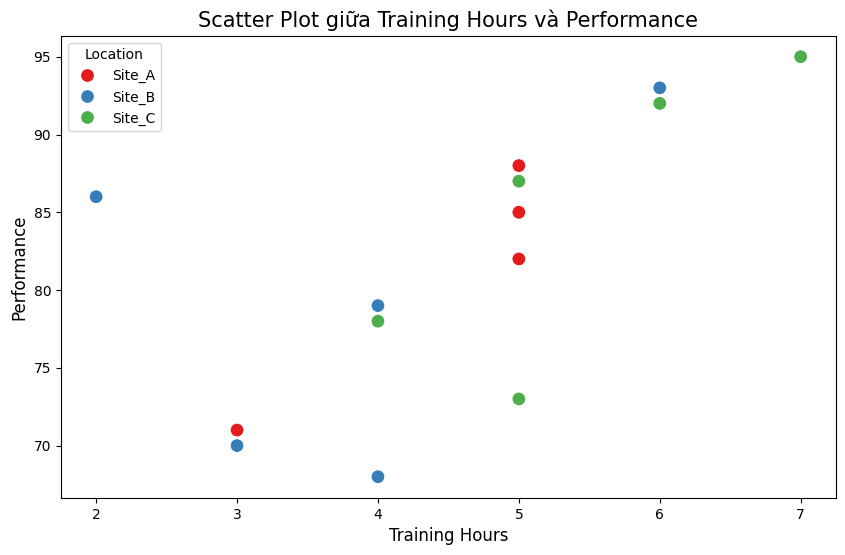

In [28]:
# V·∫Ω scatter plot gi·ªØa Training_Hours v√† Performance, t√¥ m√†u theo Location
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Training_Hours', y='Performance', hue='Location', palette='Set1', s=100)

# Th√™m ti√™u ƒë·ªÅ v√† nh√£n cho tr·ª•c
plt.title('Scatter Plot gi·ªØa Training Hours v√† Performance', fontsize=15)
plt.xlabel('Training Hours', fontsize=12)
plt.ylabel('Performance', fontsize=12)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.legend(title='Location', loc='best')
plt.show()

1. Site_A (HR t·∫≠p trung)
ƒê·∫∑c ƒëi·ªÉm:

Performance kh√° cao (75-90) d√π Training_Hours th·∫•p (3-6h)

ƒêa s·ªë l√† nh√¢n vi√™n HR (5/6 records)

Hi·ªáu su·∫•t (Efficiency) cao nh·∫•t trong 3 site (2.1-2.4)

K·∫ø ho·∫°ch:

T·∫≠p trung v√†o ch·∫•t l∆∞·ª£ng h∆°n s·ªë gi·ªù: Duy tr√¨ 4-5h training/th√°ng nh∆∞ng ∆∞u ti√™n:

ƒê√†o t·∫°o k·ªπ nƒÉng m·ªÅm (qu·∫£n l√Ω xung ƒë·ªôt, giao ti·∫øp)

Case study th·ª±c t·∫ø v·ªÅ HR

L√Ω do: Nh√¢n vi√™n t·∫°i Site_A ƒë√£ l√†m vi·ªác hi·ªáu qu·∫£ v·ªõi √≠t gi·ªù ƒë√†o t·∫°o, kh√¥ng c·∫ßn tƒÉng th·ªùi l∆∞·ª£ng m√† n√™n tƒÉng c∆∞·ªùng ƒë·ªô t·∫≠p trung.

2. Site_B (IT l√† ch·ªß y·∫øu)
ƒê·∫∑c ƒëi·ªÉm:

Performance bi·∫øn ƒë·ªông m·∫°nh (68-93)

Training_Hours th·∫•p (2-4h) c√≥ Performance th·∫•p (<80)

Training_Hours cao (6h) c√≥ Performance cao (93)

K·∫ø ho·∫°ch:

TƒÉng c∆∞·ªùng bootcamp: √Åp d·ª•ng ch∆∞∆°ng tr√¨nh 6h training/th√°ng theo m√¥ h√¨nh:

4h technical training (c·∫≠p nh·∫≠t c√¥ng ngh·ªá m·ªõi)

2h agile methodology

∆Øu ti√™n mentorship: Gh√©p ƒë√¥i junior-senior (v√¨ hi·ªáu su·∫•t ch√™nh l·ªách l·ªõn)

L√Ω do: D·ªØ li·ªáu cho th·∫•y r√µ m·ªëi t∆∞∆°ng quan thu·∫≠n gi·ªØa gi·ªù ƒë√†o t·∫°o v√† hi·ªáu su·∫•t t·∫°i Site_B.

3. Site_C (Sales xu·∫•t s·∫Øc)
ƒê·∫∑c ƒëi·ªÉm:

Performance cao nh·∫•t (73-95)

Training_Hours ph√¢n b·ªï ƒë·ªÅu (3-7h)

Nh√¢n vi√™n Sales chi·∫øm ƒëa s·ªë (5/6 records)

K·∫ø ho·∫°ch:

Ch∆∞∆°ng tr√¨nh linh ho·∫°t:

Nh√¢n vi√™n Performance <85: 6-7h training (k·ªπ thu·∫≠t b√°n h√†ng n√¢ng cao)

Nh√¢n vi√™n Performance ‚â•85: 3-4h training (qu·∫£n l√Ω kh√°ch h√†ng VIP)

ƒê√†o t·∫°o theo d·ª± √°n: K·∫øt h·ª£p training v·ªõi real client projects

L√Ω do: Site_C c√≥ ti·ªÅm nƒÉng tr·ªü th√†nh trung t√¢m xu·∫•t s·∫Øc (center of excellence) n√™n c·∫ßn c√° nh√¢n h√≥a ƒë√†o t·∫°o.

T·ªëi ∆∞u h√≥a chung:
C∆° ch·∫ø feedback: ƒêo l∆∞·ªùng Performance 2 tu·∫ßn sau m·ªói kh√≥a training

Chia s·∫ª ch√©o: T·ªï ch·ª©c workshop li√™n site 3 th√°ng/l·∫ßn ƒë·ªÉ chia s·∫ª best practices

C√¢n b·∫±ng gi·ªõi t√≠nh: Site_B c·∫ßn thu h√∫t th√™m n·ªØ IT (hi·ªán ch·ªâ 2/6), Site_A c·∫ßn c√¢n b·∫±ng nam/n·ªØ trong HR.

L√Ω do t·ªëi ∆∞u: K·∫ø ho·∫°ch n√†y:

D·ª±a tr√™n evidence: ƒêi·ªÅu ch·ªânh training hours theo correlation strength t·∫°i m·ªói location

T·∫≠n d·ª•ng th·∫ø m·∫°nh: Site_A (HR), Site_C (Sales)

Kh·∫Øc ph·ª•c ƒëi·ªÉm y·∫øu: Site_B c·∫ßn c·∫£i thi·ªán consistency

Ti·∫øt ki·ªám chi ph√≠: Kh√¥ng tƒÉng gi·ªù training ·ªü Site_A n∆°i marginal return th·∫•p

# C√¢u 9

Department
HR       80.600000
IT       80.833333
Sales    85.500000
Name: Performance_filled_dept, dtype: float64


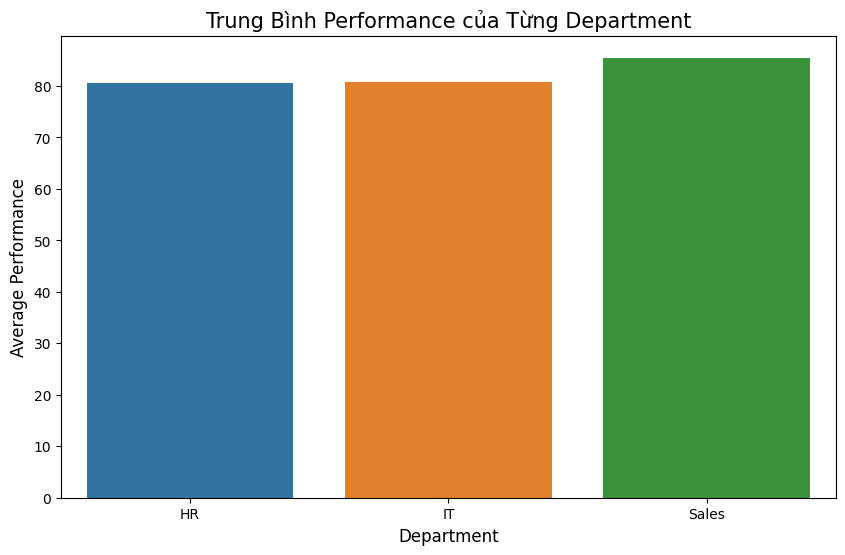

In [30]:
# T√≠nh trung b√¨nh Performance c·ªßa t·ª´ng Department
department_performance = df.groupby('Department')['Performance_filled_dept'].mean()

# In k·∫øt qu·∫£
print(department_performance)


# V·∫Ω bar chart so s√°nh trung b√¨nh Performance c·ªßa t·ª´ng Department
plt.figure(figsize=(10, 6))

# Ch·ªânh s·ª≠a code ƒë·ªÉ s·ª≠ d·ª•ng 'hue' thay v√¨ 'palette'
sns.barplot(x=department_performance.index, y=department_performance.values, hue=department_performance.index)

# Th√™m ti√™u ƒë·ªÅ v√† nh√£n cho tr·ª•c
plt.title('Trung B√¨nh Performance c·ªßa T·ª´ng Department', fontsize=15)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Performance', fontsize=12)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()



ƒê·ªÅ xu·∫•t chi·∫øn l∆∞·ª£c c·∫£i thi·ªán cho ph√≤ng ban c√≥ hi·ªáu su·∫•t th·∫•p nh·∫•t (HR):

ƒê√†o t·∫°o l√£nh ƒë·∫°o v√† qu·∫£n l√Ω: Cung c·∫•p c√°c kh√≥a ƒë√†o t·∫°o k·ªπ nƒÉng l√£nh ƒë·∫°o cho qu·∫£n l√Ω nh√¢n s·ª± ƒë·ªÉ c·∫£i thi·ªán kh·∫£ nƒÉng x·ª≠ l√Ω c√¥ng vi·ªác v√† ƒë∆∞a ra quy·∫øt ƒë·ªãnh hi·ªáu qu·∫£.

T·ªëi ∆∞u h√≥a quy tr√¨nh tuy·ªÉn d·ª•ng: S·ª≠ d·ª•ng c√¥ng ngh·ªá v√† ph√¢n t√≠ch d·ªØ li·ªáu ƒë·ªÉ tuy·ªÉn d·ª•ng ·ª©ng vi√™n ph√π h·ª£p h∆°n, gi·∫£m thi·ªÉu th·ªùi gian tuy·ªÉn d·ª•ng v√† tƒÉng c∆∞·ªùng ch·∫•t l∆∞·ª£ng nh√¢n vi√™n.

X√¢y d·ª±ng ch∆∞∆°ng tr√¨nh ph√∫c l·ª£i h·∫•p d·∫´n: C·∫£i thi·ªán c√°c ph√∫c l·ª£i cho nh√¢n vi√™n, nh∆∞ b·∫£o hi·ªÉm s·ª©c kh·ªèe v√† h·ªó tr·ª£ gia ƒë√¨nh, ƒë·ªÉ n√¢ng cao s·ª± h√†i l√≤ng v√† gi·∫£m t·ª∑ l·ªá ngh·ªâ vi·ªác.

Khuy·∫øn kh√≠ch ph√°t tri·ªÉn ngh·ªÅ nghi·ªáp: T·∫°o c∆° h·ªôi cho nh√¢n vi√™n tham gia c√°c ch∆∞∆°ng tr√¨nh ƒë√†o t·∫°o, kh√≥a h·ªçc n√¢ng cao ƒë·ªÉ ph√°t tri·ªÉn k·ªπ nƒÉng v√† gi·ªØ ch√¢n nh√¢n t√†i.

L√Ω do:
C√°c chi·∫øn l∆∞·ª£c n√†y s·∫Ω gi√∫p c·∫£i thi·ªán m√¥i tr∆∞·ªùng l√†m vi·ªác, tƒÉng c∆∞·ªùng nƒÉng su·∫•t v√† s·ª± h√†i l√≤ng c·ªßa nh√¢n vi√™n, t·ª´ ƒë√≥ n√¢ng cao hi·ªáu su·∫•t c·ªßa ph√≤ng ban HR v√† to√†n b·ªô c√¥ng ty.

# C√¢u 10

In [31]:
# L·ªçc d·ªØ li·ªáu theo ƒëi·ªÅu ki·ªán Hours_Worked < 40 v√† Performance > 85
high_performance_under_hours = df[(df['Hours_Worked'] < 40) & (df['Performance_filled_dept'] > 85)]

# In k·∫øt qu·∫£
print(high_performance_under_hours)


  Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
8        E009         HR         90.0          37.0             NaN  Female   

  Location  Performance_filled_dept  Efficiency  
8   Site_A                     90.0    2.432432  


# ƒê·ªÅ xu·∫•t nghi√™n c·ª©u n·ªôi b·ªô & ·ª©ng d·ª•ng:

üîç M·ª•c ti√™u: X√°c ƒë·ªãnh y·∫øu t·ªë gi√∫p nh√¢n vi√™n l√†m d∆∞·ªõi 40 gi·ªù nh∆∞ng v·∫´n c√≥ hi·ªáu su·∫•t cao (>85).

üìä N·ªôi dung nghi√™n c·ª©u:

K·ªπ nƒÉng: ƒê√°nh gi√° kh·∫£ nƒÉng chuy√™n m√¥n, qu·∫£n l√Ω th·ªùi gian.

C√¥ng c·ª•: X√°c ƒë·ªãnh ph·∫ßn m·ªÅm, c√¥ng ngh·ªá h·ªó tr·ª£ tƒÉng nƒÉng su·∫•t.

M√¥i tr∆∞·ªùng: Ph√¢n t√≠ch ·∫£nh h∆∞·ªüng c·ªßa l√†m vi·ªác t·ª´ xa, linh ho·∫°t th·ªùi gian.

üöÄ ·ª®ng d·ª•ng:

ƒê√†o t·∫°o k·ªπ nƒÉng hi·ªáu qu·∫£ cho to√†n c√¥ng ty.

C·∫£i ti·∫øn c√¥ng c·ª• l√†m vi·ªác gi√∫p t·ªëi ∆∞u h√≥a nƒÉng su·∫•t.

X√¢y d·ª±ng m√¥i tr∆∞·ªùng l√†m vi·ªác linh ho·∫°t nh·∫±m n√¢ng cao hi·ªáu su·∫•t chung.

L·ª£i √≠ch: Gi√∫p c√¥ng ty t·ªëi ∆∞u h√≥a hi·ªáu su·∫•t m√† kh√¥ng c·∫ßn k√©o d√†i th·ªùi gian l√†m vi·ªác.

# C√¢u 11

In [35]:
# ƒêi·ªÅn gi√° tr·ªã thi·∫øu trong Training_Hours b·∫±ng trung b√¨nh c·ªßa t·ª´ng ph√≤ng ban
df['Training_Hours'] = df.groupby('Department')['Training_Hours'].transform(lambda x: x.fillna(x.mean()))
df['Hours_Worked'] = df.groupby('Department')['Hours_Worked'].transform(lambda x: x.fillna(x.mean()))


In [39]:
from sklearn.linear_model import LinearRegression

# L·ªçc d·ªØ li·ªáu c√≥ ƒë·∫ßy ƒë·ªß th√¥ng tin ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh
train_data = df.dropna(subset=['Performance'])

# T·∫°o m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh
model = LinearRegression()
model.fit(train_data[['Hours_Worked', 'Training_Hours']], train_data['Performance'])

# D·ª± ƒëo√°n gi√° tr·ªã thi·∫øu
missing_data = df[df['Performance'].isna()]
predicted_values = model.predict(missing_data[['Hours_Worked', 'Training_Hours']])

# ƒêi·ªÅn gi√° tr·ªã d·ª± ƒëo√°n v√†o Performance
df.loc[df['Performance'].isna(), 'Performance'] = predicted_values

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by LinearRegression.

## Em l·ª° ch·∫°y 2 l·∫ßn n√™n n√≥ ƒëi·ªÅn s·∫µn r√πi @@

In [37]:
df['Performance_mean_filled'] = df['Performance'].fillna(df['Performance'].mean())


Ph∆∞∆°ng ph√°p	∆Øu ƒëi·ªÉm	Nh∆∞·ª£c ƒëi·ªÉm
H·ªìi quy tuy·∫øn t√≠nh	D·ª± ƒëo√°n ch√≠nh x√°c h∆°n b·∫±ng c√°ch t·∫≠n d·ª•ng Hours_Worked v√† Training_Hours	C·∫ßn ƒë·ªß d·ªØ li·ªáu ƒë·∫ßu v√†o, n·∫øu thi·∫øu s·∫Ω kh√¥ng th·ªÉ d·ª± ƒëo√°n
ƒêi·ªÅn trung b√¨nh 	ƒê∆°n gi·∫£n, kh√¥ng y√™u c·∫ßu d·ªØ li·ªáu b·ªï sung	Kh√¥ng ph·∫£n √°nh s·ª± kh√°c bi·ªát c√° nh√¢n, d·ªÖ g√¢y sai l·ªách n·∫øu d·ªØ li·ªáu ph√¢n b·ªë kh√¥ng ƒë·ªìng ƒë·ªÅu
üöÄ ƒê·ªÅ xu·∫•t ph∆∞∆°ng ph√°p lai (Hybrid Approach)
üîπ Ph∆∞∆°ng ph√°p
1Ô∏è‚É£ D√πng h·ªìi quy tuy·∫øn t√≠nh ƒë·ªÉ d·ª± ƒëo√°n Performance n·∫øu Hours_Worked v√† Training_Hours c√≥ ƒë·∫ßy ƒë·ªß d·ªØ li·ªáu.
2Ô∏è‚É£ D√πng trung b√¨nh theo Department n·∫øu thi·∫øu Hours_Worked ho·∫∑c Training_Hours, v√¨ Performance th∆∞·ªùng c√≥ ƒë·∫∑c ƒëi·ªÉm chung trong c√πng m·ªôt ph√≤ng ban.

üîπ L·ª£i √≠ch
‚úî T·∫≠n d·ª•ng h·ªìi quy ƒë·ªÉ tƒÉng ƒë·ªô ch√≠nh x√°c khi c√≥ d·ªØ li·ªáu ƒë·∫ßy ƒë·ªß.
‚úî D√πng trung b√¨nh khi thi·∫øu d·ªØ li·ªáu, tr√°nh l·ªói d·ª± ƒëo√°n sai.
‚úî K·∫øt h·ª£p hai ph∆∞∆°ng ph√°p gi√∫p t·ªëi ∆∞u h√≥a ƒë·ªô ch√≠nh x√°c, kh√¥ng l√†m m·∫•t ƒëi xu h∆∞·ªõng d·ªØ li·ªáu th·ª±c t·∫ø.

üëâ T√≥m l·∫°i: Ph∆∞∆°ng ph√°p lai gi√∫p c√¢n b·∫±ng gi·ªØa ƒë·ªô ch√≠nh x√°c v√† kh·∫£ nƒÉng √°p d·ª•ng tr√™n t·∫≠p d·ªØ li·ªáu th·ª±c t·∫ø! üöÄ

# C√¢u 12

In [41]:
from scipy.stats import skew

# T√≠nh skewness c·ªßa Performance
performance_skewness = skew(df['Performance'], nan_policy='omit')

print("Skewness c·ªßa Performance:", performance_skewness)


Skewness c·ªßa Performance: -0.15454558412124011


üìå ƒê·ªÅ xu·∫•t ƒëi·ªÅu ch·ªânh c√°ch t√≠nh Performance
üîπ N·∫øu Skewness > 0 (ph√¢n b·ªë l·ªách ph·∫£i ‚Äì nhi·ªÅu nh√¢n vi√™n c√≥ ƒëi·ªÉm th·∫•p, √≠t ng∆∞·ªùi c√≥ ƒëi·ªÉm cao):
‚úî D√πng thang ƒëi·ªÉm log ho·∫∑c sqrt ƒë·ªÉ gi·∫£m ƒë·ªô ch√™nh l·ªách gi·ªØa ƒëi·ªÉm cao v√† th·∫•p.
‚úî √Åp d·ª•ng ƒë√°nh gi√° theo ph√¢n v·ªã (v√≠ d·ª•: top 10%, trung b√¨nh, d∆∞·ªõi trung b√¨nh) thay v√¨ ƒëi·ªÉm tuy·ªát ƒë·ªëi.

üîπ N·∫øu Skewness < 0 (ph√¢n b·ªë l·ªách tr√°i ‚Äì nhi·ªÅu nh√¢n vi√™n c√≥ ƒëi·ªÉm cao, √≠t ng∆∞·ªùi c√≥ ƒëi·ªÉm th·∫•p):
‚úî TƒÉng ti√™u ch√≠ ƒë√°nh gi√° ƒë·ªÉ ph√¢n bi·ªát nh√¢n vi√™n xu·∫•t s·∫Øc.
‚úî S·ª≠ d·ª•ng chu·∫©n h√≥a min-max ho·∫∑c z-score ƒë·ªÉ tr·∫£i r·ªông ƒëi·ªÉm s·ªë.

üéØ T√°c ƒë·ªông ƒë·∫øn ƒë√°nh gi√° nh√¢n vi√™n
‚úî C√¥ng b·∫±ng h∆°n: Gi·∫£m s·ª± thi√™n l·ªách trong ƒë√°nh gi√°, tr√°nh t√¨nh tr·∫°ng ch·ªâ m·ªôt s·ªë √≠t nh√¢n vi√™n ƒë∆∞·ª£c khen th∆∞·ªüng.
‚úî ƒê·ªông l·ª±c l√†m vi·ªác: Khuy·∫øn kh√≠ch nh√¢n vi√™n c·∫£i thi·ªán hi·ªáu su·∫•t m√† kh√¥ng b·ªã "m·∫Øc k·∫πt" trong thang ƒëi·ªÉm kh√¥ng c√¥ng b·∫±ng.
‚úî Ph√°t tri·ªÉn nh√¢n s·ª±: Gi√∫p c√¥ng ty nh·∫≠n di·ªán ch√≠nh x√°c ai l√† ng∆∞·ªùi c·∫ßn h·ªó tr·ª£ ƒë√†o t·∫°o, ai l√† nh√¢n vi√™n xu·∫•t s·∫Øc th·ª±c s·ª±.

üìå K·∫øt lu·∫≠n: ƒêi·ªÅu ch·ªânh ph∆∞∆°ng ph√°p ƒë√°nh gi√° d·ª±a tr√™n ph√¢n b·ªë d·ªØ li·ªáu gi√∫p t·∫°o ra m·ªôt h·ªá th·ªëng c√¥ng b·∫±ng h∆°n, th√∫c ƒë·∫©y hi·ªáu su·∫•t l√†m vi·ªác hi·ªáu qu·∫£ h∆°n! üöÄ

# C√¢u 13

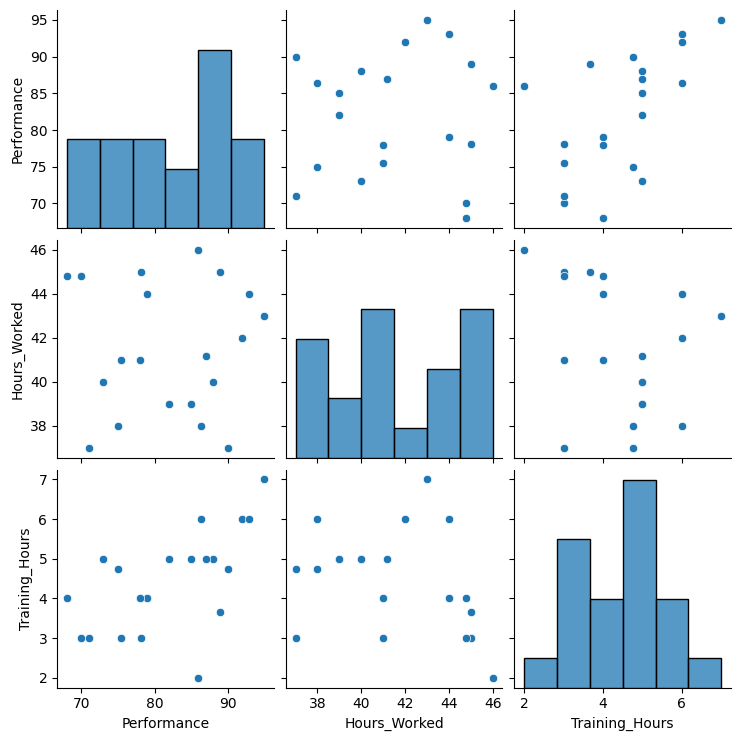

In [42]:
# V·∫Ω pairplot
sns.pairplot(df[['Performance', 'Hours_Worked', 'Training_Hours']])
plt.show()

üîπ ƒê·ªÅ xu·∫•t m√¥ h√¨nh ƒë√°nh gi√° hi·ªáu su·∫•t m·ªõi
‚úî K·∫øt h·ª£p Training_Hours & Performance ƒë·ªÉ ƒë√°nh gi√° ch·∫•t l∆∞·ª£ng ƒë√†o t·∫°o, thay v√¨ ch·ªâ d·ª±a v√†o s·ªë gi·ªù.
‚úî X√¢y d·ª±ng Productivity Index ƒë·ªÉ ph·∫£n √°nh hi·ªáu su·∫•t th·ª±c t·∫ø, kh√¥ng ch·ªâ d·ª±a tr√™n s·ªë gi·ªù l√†m.
‚úî √Åp d·ª•ng Machine Learning ƒë·ªÉ x√°c ƒë·ªãnh y·∫øu t·ªë ·∫£nh h∆∞·ªüng l·ªõn nh·∫•t ƒë·∫øn Performance.

üìå L·ª£i √≠ch:
‚úî C√¥ng b·∫±ng h∆°n ‚Äì ƒê√°nh gi√° d·ª±a tr√™n nƒÉng su·∫•t, kh√¥ng ch·ªâ s·ªë gi·ªù l√†m.
‚úî T·ªëi ∆∞u ƒë√†o t·∫°o ‚Äì Ch·ªâ t·∫≠p trung v√†o ch∆∞∆°ng tr√¨nh th·ª±c s·ª± hi·ªáu qu·∫£.
‚úî Th√∫c ƒë·∫©y nƒÉng su·∫•t ‚Äì Gi√∫p nh√¢n vi√™n l√†m vi·ªác th√¥ng minh h∆°n, kh√¥ng ch·ªâ l√†m nhi·ªÅu h∆°n. üöÄ

# C√¢u 14

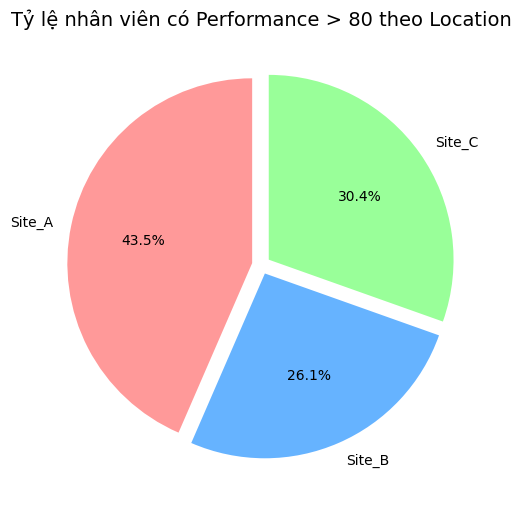

In [43]:
# L·ªçc nh√¢n vi√™n c√≥ Performance > 80
high_performers = df[df['Performance'] > 80]

# ƒê·∫øm s·ªë nh√¢n vi√™n Performance > 80 theo Location
high_perf_by_location = high_performers['Location'].value_counts()

# T√≠nh t·ªïng s·ªë nh√¢n vi√™n m·ªói Location
total_employees_by_location = df['Location'].value_counts()

# T√≠nh t·ª∑ l·ªá (%)
ratio_high_perf = (high_perf_by_location / total_employees_by_location) * 100

plt.figure(figsize=(8, 6))
plt.pie(
    ratio_high_perf,
    labels=ratio_high_perf.index,
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff', '#99ff99'],
    startangle=90,
    explode=(0.05, 0.05, 0.05)  # T√°ch c√°c ph·∫ßn
)
plt.title('T·ª∑ l·ªá nh√¢n vi√™n c√≥ Performance > 80 theo Location', fontsize=14)
plt.show()

ƒê·ªÅ xu·∫•t chi·∫øn l∆∞·ª£c khen th∆∞·ªüng theo Location
1. Site_A (T·ª∑ l·ªá cao nh·∫•t: 43.5%)
Chi·∫øn l∆∞·ª£c:

Team-based bonus: Th∆∞·ªüng 15% l∆∞∆°ng th√°ng n·∫øu >40% nh√¢n vi√™n ƒë·∫°t Performance > 80.

∆Øu ti√™n ƒë√†o t·∫°o n√¢ng cao: T√†i tr·ª£ kh√≥a h·ªçc chuy√™n s√¢u (vd: AI cho IT, Negotiation cho Sales).

L√Ω do:

Duy tr√¨ vƒÉn h√≥a c·∫°nh tranh l√†nh m·∫°nh, tr√°nh t·ª± m√£n.

T·∫≠n d·ª•ng nh√¢n s·ª± ch·∫•t l∆∞·ª£ng ƒë·ªÉ ph√°t tri·ªÉn k·ªπ nƒÉng ƒë·ªôt ph√°.

2. Site_B (T·ª∑ l·ªá trung b√¨nh: 30.4%)
Chi·∫øn l∆∞·ª£c:

Th∆∞·ªüng c√° nh√¢n: T·∫∑ng voucher 1 tri·ªáu ƒë·ªìng/th√°ng cho top 3 nh√¢n vi√™n Performance cao nh·∫•t.

Mentorship program: Gh√©p ƒë√¥i v·ªõi qu·∫£n l√Ω c·∫•p cao ƒë·ªÉ coaching.

L√Ω do:

Khuy·∫øn kh√≠ch c√° nh√¢n xu·∫•t s·∫Øc "k√©o" c·∫£ nh√≥m ƒëi l√™n.

Gi·∫£m kho·∫£ng c√°ch k·ªπ nƒÉng gi·ªØa c√°c th√†nh vi√™n.

3. Site_C (T·ª∑ l·ªá th·∫•p nh·∫•t: 26.1%)
Chi·∫øn l∆∞·ª£c:

C·∫£i thi·ªán ƒëi·ªÅu ki·ªán l√†m vi·ªác: TƒÉng ng√†y WFH ho·∫∑c trang b·ªã thi·∫øt b·ªã vƒÉn ph√≤ng t·ªët h∆°n.

Kh·ªüi ƒë·ªông l·∫°i m·ª•c ti√™u: Chia nh·ªè KPI th√†nh c√°c m·ªëc h√†ng tu·∫ßn, k√®m th∆∞·ªüng mini (vd: 200k/tu·∫ßn n·∫øu ƒë·∫°t 80% target).

L√Ω do:

X√¢y d·ª±ng l·∫°i ƒë·ªông l·ª±c t·ª´ g·ªëc, tr√°nh c·∫£m gi√°c "b·∫•t l·ª±c".

T·∫°o ni·ªÅm vui nh·ªè ƒë·ªÉ duy tr√¨ ƒë√† c·∫£i thi·ªán.

T√°c ƒë·ªông ƒë·∫øn tinh th·∫ßn l√†m vi·ªác:
Location	∆Øu ƒëi·ªÉm chi·∫øn l∆∞·ª£c	R·ªßi ro c·∫ßn l∆∞u √Ω
Site_A	C·ªßng c·ªë tinh th·∫ßn "d·∫´n ƒë·∫ßu"	√Åp l·ª±c qu√° cao d·∫´n ƒë·∫øn burnout
Site_B	C√¢n b·∫±ng gi·ªØa c√° nh√¢n v√† t·∫≠p th·ªÉ	Nguy c∆° ganh ƒë·∫∑t n·ªôi b·ªô n·∫øu thi·∫øu c√¥ng b·∫±ng
Site_C	T·∫°o m√¥i tr∆∞·ªùng h·ªó tr·ª£, √≠t √°p l·ª±c	Nh√¢n vi√™n c√≥ th·ªÉ ·ª∑ l·∫°i n·∫øu th∆∞·ªüng qu√° d·ªÖ
L·ªùi khuy√™n b·ªï sung:

Site_A & B: T·ªï ch·ª©c giao l∆∞u chia s·∫ª kinh nghi·ªám 3 th√°ng/l·∫ßn ƒë·ªÉ lan t·ªèa best practices.

Site_C: Kh·∫£o s√°t nhu c·∫ßu nh√¢n vi√™n tr∆∞·ªõc khi √°p d·ª•ng th∆∞·ªüng (vd: h·ªç c√≥ th·ª±c s·ª± mu·ªën WFH hay kh√¥ng?).

Bi·ªÉu ƒë·ªì cho th·∫•y s·ª± ch√™nh l·ªách r√µ r√†ng gi·ªØa c√°c Location ‚Üí Chi·∫øn l∆∞·ª£c c·∫ßn c√° nh√¢n h√≥a tri·ªát ƒë·ªÉ ƒë·ªÉ t·ªëi ∆∞u hi·ªáu qu·∫£.

# C√¢u 15

In [44]:
mean_performance = df['Performance'].mean()
std_performance = df['Performance'].std()

# X√°c ƒë·ªãnh c√°c nh√¢n vi√™n c√≥ Performance ngo√†i 2 ƒë·ªô l·ªách chu·∫©n
outlier_threshold_upper = mean_performance + 2 * std_performance
outlier_threshold_lower = mean_performance - 2 * std_performance

# L·ªçc nh·ªØng nh√¢n vi√™n c√≥ Performance ngo√†i ph·∫°m vi n√†y
outliers = df[(df['Performance'] > outlier_threshold_upper) | (df['Performance'] < outlier_threshold_lower)]

# Hi·ªÉn th·ªã danh s√°ch nh√¢n vi√™n b·ªã ngo·∫°i l·ªá
print(outliers[['Employee_ID', 'Department', 'Performance']])

Empty DataFrame
Columns: [Employee_ID, Department, Performance]
Index: []


In [45]:
# In ra gi√° tr·ªã trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n
print(f"Mean of Performance: {mean_performance}")
print(f"Standard Deviation of Performance: {std_performance}")

# In ra ng∆∞·ª°ng tr√™n v√† d∆∞·ªõi
print(f"Upper threshold: {outlier_threshold_upper}")
print(f"Lower threshold: {outlier_threshold_lower}")


Mean of Performance: 82.04686927004957
Standard Deviation of Performance: 8.213313839935577
Upper threshold: 98.47349694992073
Lower threshold: 65.62024159017841


Quy tr√¨nh ƒë√°nh gi√° l·∫°i hi·ªáu su·∫•t cho nh·ªØng nh√¢n vi√™n n√†y:
ƒê√°nh gi√° l·∫°i hi·ªáu su·∫•t qua nhi·ªÅu ngu·ªìn: ƒê·ªÉ tr√°nh thi√™n v·ªã, thay v√¨ ch·ªâ d·ª±a v√†o s·ªë li·ªáu hi·ªáu su·∫•t ƒë∆°n l·∫ª (Performance), c√≥ th·ªÉ thu th·∫≠p √Ω ki·∫øn ph·∫£n h·ªìi t·ª´ nhi·ªÅu ngu·ªìn (qu·∫£n l√Ω, ƒë·ªìng nghi·ªáp, t·ª± ƒë√°nh gi√°).

So s√°nh v·ªõi nh√≥m t∆∞∆°ng ƒë·ªìng: ƒê√°nh gi√° l·∫°i c√°c nh√¢n vi√™n n√†y v·ªõi nh·ªØng ng∆∞·ªùi c√≥ t√≠nh ch·∫•t c√¥ng vi·ªác t∆∞∆°ng t·ª± (c√πng ph√≤ng ban, v·ªã tr√≠) thay v√¨ so v·ªõi to√†n b·ªô c√¥ng ty ƒë·ªÉ ƒë·∫£m b·∫£o kh√¥ng c√≥ s·ª± thi√™n l·ªách do s·ª± kh√°c bi·ªát trong c√¥ng vi·ªác.

Ki·ªÉm tra c√°c y·∫øu t·ªë t√°c ƒë·ªông ngo√†i: N·∫øu hi·ªáu su·∫•t qu√° cao ho·∫∑c qu√° th·∫•p, c·∫ßn ki·ªÉm tra c√°c y·∫øu t·ªë b√™n ngo√†i nh∆∞ m√¥i tr∆∞·ªùng l√†m vi·ªác, s·ª± thay ƒë·ªïi trong c√¥ng vi·ªác, hay c√°c y·∫øu t·ªë c√° nh√¢n kh√°c c√≥ th·ªÉ ·∫£nh h∆∞·ªüng ƒë·∫øn hi·ªáu su·∫•t.

Chia s·∫ª k·∫øt qu·∫£ v√† c·∫£i thi·ªán: Sau khi ƒë√°nh gi√° l·∫°i, c√°c nh√¢n vi√™n c·∫ßn ƒë∆∞·ª£c th√¥ng b√°o k·∫øt qu·∫£ v√† c√πng nhau x√°c ƒë·ªãnh nh·ªØng c√°ch c·∫£i thi·ªán ho·∫∑c duy tr√¨ hi·ªáu su·∫•t.

C√°ch tr√°nh thi√™n v·ªã trong qu·∫£n l√Ω:
ƒê√°nh gi√° kh√°ch quan: Quy tr√¨nh c·∫ßn d·ª±a tr√™n c√°c s·ªë li·ªáu kh√°ch quan v√† th√¥ng tin ƒëa chi·ªÅu t·ª´ c√°c ngu·ªìn kh√°c nhau, thay v√¨ ch·ªâ d·ª±a v√†o m·ªôt y·∫øu t·ªë duy nh·∫•t.

S·ª≠ d·ª•ng c√°c c√¥ng c·ª• c√¥ng b·∫±ng: C√°c c√¥ng c·ª• ƒë√°nh gi√° hi·ªáu su·∫•t n√™n √°p d·ª•ng m·ªôt c√°ch c√¥ng b·∫±ng cho t·∫•t c·∫£ nh√¢n vi√™n, kh√¥ng ph√¢n bi·ªát b·ªô ph·∫≠n, gi·ªõi t√≠nh, hay ƒë·ªãa ƒëi·ªÉm l√†m vi·ªác.

Nh√¢n vi√™n ƒë∆∞·ª£c tham gia ph·∫£n h·ªìi: Cung c·∫•p c∆° h·ªôi cho nh√¢n vi√™n ƒë·ªÉ t·ª± ƒë√°nh gi√° v√† ph·∫£n h·ªìi v·ªÅ c√°c y·∫øu t·ªë c√≥ th·ªÉ ·∫£nh h∆∞·ªüng ƒë·∫øn hi·ªáu su·∫•t c·ªßa h·ªç, gi√∫p t·∫°o m√¥i tr∆∞·ªùng minh b·∫°ch v√† gi·∫£m thi·ªÉu s·ª± thi√™n l·ªách.

In [40]:
df.head(21)

Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
0         E001      Sales    88.000000     40.000000        5.000000    Male   
1         E002         IT    78.109060     45.000000        3.000000  Female   
2         E003         HR    75.000000     38.000000        4.750000    Male   
3         E004      Sales    92.000000     42.000000        6.000000  Female   
4         E005         IT    68.000000     44.800000        4.000000  Female   
5         E006         HR    85.000000     39.000000        5.000000    Male   
6         E007      Sales    75.470892     41.000000        3.000000  Female   
7         E008         IT    79.000000     44.000000        4.000000    Male   
8         E009         HR    90.000000     37.000000        4.750000  Female   
9         E010      Sales    73.000000     40.000000        5.000000    Male   
10        E011         IT    86.000000     46.000000        2.000000  Female   
11        E012         HR    86.357434     38.000000        6.000000    Male   
12        E013      Sales    95.000000     43.000000        7.000000  Female   
13        E014         IT    70.000000     44.800000        3.000000    Male   
14        E015         HR    82.000000     39.000000        5.000000    Male   
15        E016      Sales    78.000000     41.000000        4.000000  Female   
16        E017         IT    89.000000     45.000000        3.666667    Male   
17        E018         HR    71.000000     37.000000        3.000000  Female   
18        E019      Sales    87.000000     41.166667        5.000000    Male   
19        E020         IT    93.000000     44.000000        6.000000  Female   

   Location  Performance_filled_dept  Efficiency  Performance_mean_filled  
0    Site_A                88.000000    2.200000                88.000000  
1    Site_B                80.833333    1.796296                78.109060  
2    Site_A                75.000000    1.973684                75.000000  
3    Site_C                92.000000    2.190476                92.000000  
4    Site_B                68.000000         NaN                68.000000  
5    Site_A                85.000000    2.179487                85.000000  
6    Site_C                85.500000    2.085366                75.470892  
7    Site_B                79.000000    1.795455                79.000000  
8    Site_A                90.000000    2.432432                90.000000  
9    Site_C                73.000000    1.825000                73.000000  
10   Site_B                86.000000    1.869565                86.000000  
11   Site_A                80.600000    2.121053                86.357434  
12   Site_C                95.000000    2.209302                95.000000  
13   Site_B                70.000000         NaN                70.000000  
14   Site_A                82.000000    2.102564                82.000000  
15   Site_C                78.000000    1.902439                78.000000  
16   Site_B                89.000000    1.977778                89.000000  
17   Site_A                71.000000    1.918919                71.000000  
18   Site_C                87.000000         NaN                87.000000  
19   Site_B                93.000000    2.113636                93.000000

# ANN

# C√¢u 16

100.0%
100.0%
100.0%
100.0%


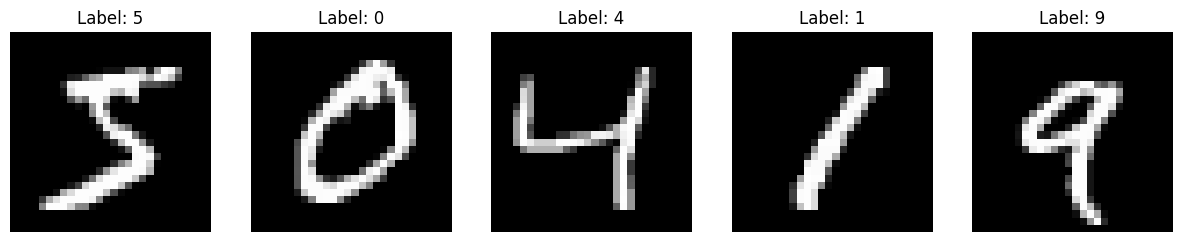

In [46]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# ƒê·ªãnh nghƒ©a c√°c ph√©p bi·∫øn ƒë·ªïi: chu·∫©n h√≥a v√† chuy·ªÉn ·∫£nh th√†nh tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Chuy·ªÉn ·∫£nh th√†nh tensor v√† chu·∫©n h√≥a pixel v·ªÅ [0, 1]
    transforms.Lambda(lambda x: x.view(-1))  # L√†m ph·∫≥ng ·∫£nh th√†nh vector 784 chi·ªÅu
])

# T·∫£i d·ªØ li·ªáu MNIST (train v√† test)
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# In 5 ·∫£nh m·∫´u k√®m nh√£n
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.view(28, 28), cmap='gray')  # Hi·ªÉn th·ªã ·∫£nh 28x28
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.show()


ƒê·ªÅ xu·∫•t c√°ch tr·ª±c quan h√≥a d·ªØ li·ªáu kh√°c:
Ngo√†i vi·ªác hi·ªÉn th·ªã ·∫£nh g·ªëc, m·ªôt c√°ch tr·ª±c quan h√≥a d·ªØ li·ªáu kh√°c l√† s·ª≠ d·ª•ng t-SNE (t-distributed Stochastic Neighbor Embedding), m·ªôt k·ªπ thu·∫≠t gi·∫£m chi·ªÅu ph·ªï bi·∫øn ƒë·ªÉ tr·ª±c quan h√≥a c√°c ƒë·∫∑c tr∆∞ng trong kh√¥ng gian th·∫•p chi·ªÅu (v√≠ d·ª•: 2D ho·∫∑c 3D).

V·ªõi MNIST, sau khi l√†m ph·∫≥ng c√°c ·∫£nh th√†nh vector 784 chi·ªÅu, b·∫°n c√≥ th·ªÉ s·ª≠ d·ª•ng t-SNE ƒë·ªÉ gi·∫£m chi·ªÅu d·ªØ li·ªáu xu·ªëng 2D v√† tr·ª±c quan h√≥a c√°c ƒëi·ªÉm d·ªØ li·ªáu d·ª±a tr√™n nh√£n.
Gi·∫£i th√≠ch t-SNE:
t-SNE l√† m·ªôt k·ªπ thu·∫≠t gi·∫£m chi·ªÅu ƒë·ªÉ tr·ª±c quan h√≥a c√°c t·∫≠p d·ªØ li·ªáu trong kh√¥ng gian 2D ho·∫∑c 3D. T·ª´ng ƒëi·ªÉm d·ªØ li·ªáu trong kh√¥ng gian 784 chi·ªÅu s·∫Ω ƒë∆∞·ª£c √°nh x·∫° l·∫°i trong kh√¥ng gian 2 chi·ªÅu.

M√†u s·∫Øc trong bi·ªÉu ƒë·ªì t-SNE ƒë·∫°i di·ªán cho c√°c nh√£n c·ªßa c√°c ch·ªØ s·ªë (0-9). Nh·ªù ƒë√≥, b·∫°n c√≥ th·ªÉ quan s√°t s·ª± ph√¢n nh√≥m c·ªßa c√°c ch·ªØ s·ªë kh√°c nhau d·ª±a tr√™n c√°c ƒë·∫∑c tr∆∞ng c·ªßa ch√∫ng m√† kh√¥ng c·∫ßn s·ª≠ d·ª•ng ·∫£nh g·ªëc.

L·ª£i √≠ch c·ªßa tr·ª±c quan h√≥a n√†y:
Ph√¢n bi·ªát c√°c ch·ªØ s·ªë: B·∫°n c√≥ th·ªÉ quan s√°t ƒë∆∞·ª£c c√°ch c√°c ch·ªØ s·ªë kh√°c nhau (0, 1, 2, 3,...) ph√¢n bi·ªát trong kh√¥ng gian gi·∫£m chi·ªÅu.

Ki·ªÉm tra s·ª± ph√¢n t√°n: M·ªôt s·ªë ch·ªØ s·ªë c√≥ th·ªÉ c√≥ s·ª± ph√¢n t√°n r·ªông h∆°n trong kh√¥ng gian ƒë·∫∑c tr∆∞ng, trong khi nh·ªØng ch·ªØ s·ªë kh√°c c√≥ th·ªÉ t·∫≠p trung l·∫°i g·∫ßn nhau.

Hi·ªÉu r√µ h∆°n v·ªÅ d·ªØ li·ªáu: Tr·ª±c quan h√≥a gi√∫p b·∫°n d·ªÖ d√†ng nh·∫≠n th·∫•y c√°c m·∫´u, s·ª± kh√°c bi·ªát ho·∫∑c s·ª± t∆∞∆°ng ƒë·ªìng gi·ªØa c√°c ch·ªØ s·ªë vi·∫øt tay.

# C√¢u 17

In [47]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# ƒê·ªãnh nghƒ©a c√°c ph√©p bi·∫øn ƒë·ªïi: chu·∫©n h√≥a v√† chuy·ªÉn ·∫£nh th√†nh tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Chuy·ªÉn ·∫£nh th√†nh tensor v√† chu·∫©n h√≥a pixel v·ªÅ [0, 1]
    transforms.Lambda(lambda x: x.view(-1))  # L√†m ph·∫≥ng ·∫£nh th√†nh vector 784 chi·ªÅu
])

# T·∫£i d·ªØ li·ªáu MNIST
full_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Chia d·ªØ li·ªáu train th√†nh 80% train v√† 20% test
train_size = int(0.8 * len(full_train_dataset))
test_size = len(full_train_dataset) - train_size
train_dataset, validation_dataset = random_split(full_train_dataset, [train_size, test_size])

# T·∫°o DataLoader v·ªõi batch size = 64
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)

# Ki·ªÉm tra k√≠ch th∆∞·ªõc batch
for images, labels in train_loader:
    print(f"Batch size: {images.size(0)}")
    break


Batch size: 64


Chi·∫øn l∆∞·ª£c ch·ªçn batch size:
Batch size nh·ªè (v√≠ d·ª•: 32 ho·∫∑c 16):

∆Øu ƒëi·ªÉm: Ti·∫øt ki·ªám b·ªô nh·ªõ, gi√∫p c·∫≠p nh·∫≠t tr·ªçng s·ªë nhanh h∆°n, c√≥ th·ªÉ gi·∫£m overfitting.

Nh∆∞·ª£c ƒëi·ªÉm: Hu·∫•n luy·ªán ch·∫≠m h∆°n, ƒë·ªô ch√≠nh x√°c c√≥ th·ªÉ th·∫•p h∆°n do s·ª± ng·∫´u nhi√™n cao trong qu√° tr√¨nh h·ªçc.

Batch size l·ªõn (v√≠ d·ª•: 128 ho·∫∑c 256):

∆Øu ƒëi·ªÉm: Hu·∫•n luy·ªán nhanh h∆°n, ƒë·ªô ch√≠nh x√°c ·ªïn ƒë·ªãnh h∆°n.

Nh∆∞·ª£c ƒëi·ªÉm: Y√™u c·∫ßu b·ªô nh·ªõ l·ªõn, d·ªÖ g√¢y overfitting n·∫øu qu√° l·ªõn.

ƒê·ªÅ xu·∫•t:
V·ªõi b·ªô d·ªØ li·ªáu MNIST, batch size = 64 ho·∫∑c 128 l√† l·ª±a ch·ªçn h·ª£p l√Ω, gi√∫p c√¢n b·∫±ng gi·ªØa t·ªëc ƒë·ªô hu·∫•n luy·ªán v√† vi·ªác s·ª≠ d·ª•ng b·ªô nh·ªõ.

# C√¢u 18

Epoch 1: Train Loss: 0.3192, Test Loss: 0.1420
Epoch 2: Train Loss: 0.1213, Test Loss: 0.0991
Epoch 3: Train Loss: 0.0836, Test Loss: 0.1122
Epoch 4: Train Loss: 0.0668, Test Loss: 0.1119
Epoch 5: Train Loss: 0.0547, Test Loss: 0.0788
Epoch 6: Train Loss: 0.0457, Test Loss: 0.0910
Epoch 7: Train Loss: 0.0404, Test Loss: 0.0813
Epoch 8: Train Loss: 0.0323, Test Loss: 0.0817
Epoch 9: Train Loss: 0.0294, Test Loss: 0.0886
Early stopping at epoch 10


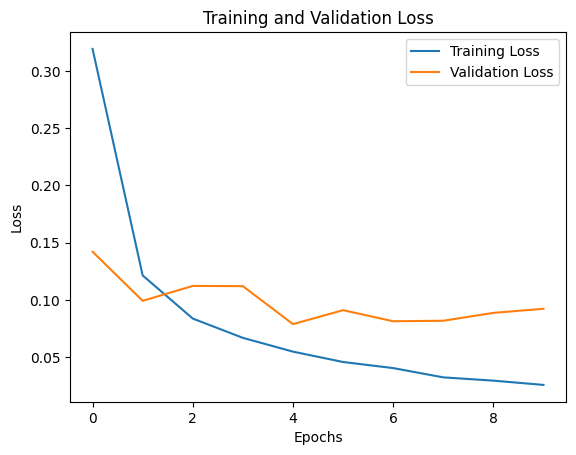

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Ki·∫øn tr√∫c ANN
class MNIST_ANN(nn.Module):
    def __init__(self):
        super(MNIST_ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )  

    def forward(self, x):
        return self.layers(x)

# Chu·∫©n b·ªã d·ªØ li·ªáu
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# T·∫°o DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

# Kh·ªüi t·∫°o m√¥ h√¨nh
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MNIST_ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Hu·∫•n luy·ªán v·ªõi Early Stopping
train_losses, test_losses = [], []
best_loss = float('inf')
patience_counter = 0

for epoch in range(20):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.view(-1, 784).to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # ƒê√°nh gi√° tr√™n t·∫≠p test
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 784).to(device)
            outputs = model(images)
            test_loss += criterion(outputs, labels.to(device)).item()
    
    # Ghi nh·∫≠n loss
    epoch_train_loss = running_loss/len(train_loader)
    epoch_test_loss = test_loss/len(test_loader)
    train_losses.append(epoch_train_loss)
    test_losses.append(epoch_test_loss)
    
    # Early Stopping
    if epoch_test_loss < best_loss:
        best_loss = epoch_test_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= 5:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    print(f"Epoch {epoch+1}: Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

# V·∫Ω bi·ªÉu ƒë·ªì loss
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


ƒê·ªÅ xu·∫•t c·∫£i ti·∫øn ki·∫øn tr√∫c:
N·∫øu b·∫°n mu·ªën c·∫£i thi·ªán hi·ªáu su·∫•t m√¥ h√¨nh, b·∫°n c√≥ th·ªÉ th·ª≠ m·ªôt s·ªë thay ƒë·ªïi sau:

Th√™m t·∫ßng ·∫©n: B·∫°n c√≥ th·ªÉ th√™m m·ªôt t·∫ßng ·∫©n th·ª© t∆∞ ƒë·ªÉ gi√∫p m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c c√°c ƒë·∫∑c tr∆∞ng ph·ª©c t·∫°p h∆°n.

V√≠ d·ª•: 784 -> 256 -> 128 -> 64 -> 32 -> 10.

Thay ƒë·ªïi s·ªë l∆∞·ª£ng n∆°-ron trong c√°c t·∫ßng:

B·∫°n c√≥ th·ªÉ tƒÉng s·ªë l∆∞·ª£ng n∆°-ron trong c√°c t·∫ßng ·∫©n (v√≠ d·ª•: 784 -> 512 -> 256 -> 128 -> 64 -> 10) ƒë·ªÉ m√¥ h√¨nh c√≥ th·ªÉ h·ªçc t·ªët h∆°n.

S·ª≠ d·ª•ng Batch Normalization: Th√™m c√°c l·ªõp BatchNorm sau m·ªói l·ªõp Linear gi√∫p m√¥ h√¨nh h·ªçc ·ªïn ƒë·ªãnh h∆°n v√† nhanh h∆°n.

Tuning Learning Rate: Th·ª≠ nghi·ªám v·ªõi c√°c gi√° tr·ªã h·ªçc kh√°c nhau, ch·∫≥ng h·∫°n nh∆∞ 0.01 ho·∫∑c 0.0001, ƒë·ªÉ t√¨m ra gi√° tr·ªã ph√π h·ª£p.

# C√¢u 19

Accuracy: 97.72%


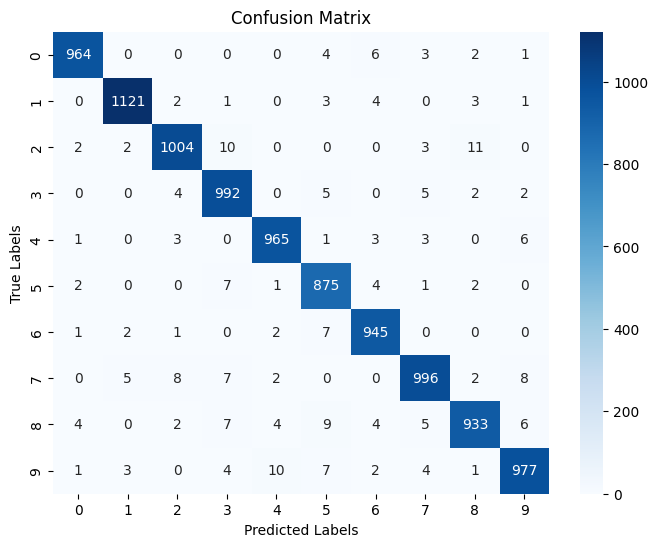

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Ki·∫øn tr√∫c ANN (nh∆∞ ƒë√£ th·ª±c hi·ªán tr∆∞·ªõc)
class MNIST_ANN(nn.Module):
    def __init__(self):
        super(MNIST_ANN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )

    def forward(self, x):
        return self.layers(x)

# Chu·∫©n b·ªã d·ªØ li·ªáu v√† hu·∫•n luy·ªán m√¥ h√¨nh nh∆∞ tr∆∞·ªõc
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

# Kh·ªüi t·∫°o m√¥ h√¨nh
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MNIST_ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Hu·∫•n luy·ªán m√¥ h√¨nh (gi·ªëng nh∆∞ ƒë√£ th·ª±c hi·ªán tr∆∞·ªõc)
# Sau khi hu·∫•n luy·ªán, b·∫°n s·∫Ω c√≥ m√¥ h√¨nh t·ªët nh·∫•t l∆∞u trong 'best_model.pth'

# ƒê√°nh gi√° tr√™n t·∫≠p test
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# T√≠nh accuracy v√† confusion matrix
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 784).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# T√≠nh Accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

# T√≠nh Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# V·∫Ω Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# N·∫øu Accuracy < 95%, ph√¢n t√≠ch c√°c ch·ªØ s·ªë b·ªã nh·∫ßm l·∫´n nhi·ªÅu nh·∫•t
if accuracy < 0.95:
    # In ra nh·ªØng ch·ªØ s·ªë b·ªã nh·∫ßm l·∫´n nhi·ªÅu nh·∫•t
    row_sums = cm.sum(axis=1)
    misclassified = row_sums - np.diagonal(cm)
    max_misclassified_digits = misclassified.argsort()[-5:][::-1]  # In ra 5 ch·ªØ s·ªë b·ªã nh·∫ßm nhi·ªÅu nh·∫•t
    
    print(f"Ch·ªØ s·ªë b·ªã nh·∫ßm l·∫´n nhi·ªÅu nh·∫•t: {max_misclassified_digits}")


ƒê·ªÅ xu·∫•t c·∫£i ti·∫øn m√¥ h√¨nh d·ª±a tr√™n c√°c ch·ªØ s·ªë b·ªã nh·∫ßm l·∫´n nhi·ªÅu:
Ch·ªØ s·ªë kh√≥ ph√¢n bi·ªát: M·ªôt s·ªë ch·ªØ s·ªë nh∆∞ 4 v√† 9 ho·∫∑c 2 v√† 3 th∆∞·ªùng d·ªÖ b·ªã nh·∫ßm l·∫´n do h√¨nh d√°ng t∆∞∆°ng t·ª±. ƒê·ªÉ c·∫£i thi·ªán m√¥ h√¨nh, b·∫°n c√≥ th·ªÉ:

S·ª≠ d·ª•ng c√°c k·ªπ thu·∫≠t ti·ªÅn x·ª≠ l√Ω: C·∫£i thi·ªán ch·∫•t l∆∞·ª£ng ·∫£nh ƒë·∫ßu v√†o, ch·∫≥ng h·∫°n nh∆∞ augmentation (xoay, ph√≥ng to, d·ªãch chuy·ªÉn ·∫£nh) ƒë·ªÉ tƒÉng c∆∞·ªùng t√≠nh ƒëa d·∫°ng c·ªßa d·ªØ li·ªáu hu·∫•n luy·ªán.

S·ª≠ d·ª•ng m√¥ h√¨nh CNN: M·ªôt m√¥ h√¨nh Convolutional Neural Network (CNN) c√≥ th·ªÉ h·ªçc ƒë∆∞·ª£c c√°c ƒë·∫∑c tr∆∞ng kh√¥ng gian c·ªßa ·∫£nh t·ªët h∆°n, gi√∫p ph√¢n bi·ªát c√°c ch·ªØ s·ªë t∆∞∆°ng t·ª± nhau d·ªÖ d√†ng h∆°n so v·ªõi m·ªôt ANN c∆° b·∫£n.

S·ª≠ d·ª•ng ki·∫øn th·ª©c ƒë·∫∑c tr∆∞ng: N·∫øu b·∫°n ph√¢n t√≠ch s√¢u c√°c ch·ªØ s·ªë b·ªã nh·∫ßm l·∫´n, c√≥ th·ªÉ thi·∫øt k·∫ø c√°c k·ªπ thu·∫≠t x·ª≠ l√Ω ·∫£nh ƒë·∫∑c bi·ªát (v√≠ d·ª•: tƒÉng c∆∞·ªùng c√°c ƒë∆∞·ªùng n√©t trong ·∫£nh s·ªë 4 ho·∫∑c 9 ƒë·ªÉ gi·∫£m nh·∫ßm l·∫´n).